## Session 10 - Image search with VGG16 and K-Nearest Neighbours

In [2]:
# base tools
import os, sys
sys.path.append(os.path.join(".."))

# data analysis
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm # gives a progress bar which is nice and easy to understand. 

# tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import (load_img, 
                                                  img_to_array)
from tensorflow.keras.applications.vgg16 import (VGG16, 
                                                 preprocess_input)
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2023-05-02 12:55:10.979633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Helper functions

Q: What kind of preprocessing am I doing here? Why do you think I'm doing it?

In [3]:
def extract_features(img_path, model):
    """
    Extract features from image data using pretrained model (e.g. VGG16)
    """
    # Define input image shape - remember we need to reshape
    input_shape = (224, 224, 3)
    # load image from file path
    img = load_img(img_path, target_size=(input_shape[0], 
                                          input_shape[1]))
    # convert to array
    img_array = img_to_array(img)
    # expand to fit dimensions
    expanded_img_array = np.expand_dims(img_array, axis=0)
    # preprocess image - see last week's notebook
    preprocessed_img = preprocess_input(expanded_img_array)
    # use the predict function to create feature representation
    features = model.predict(preprocessed_img)
    # flatten
    flattened_features = features.flatten()
    # normalise features
    normalized_features = flattened_features / norm(features) # norm is from numpy --> a slightly more sophisticated type of normalization than just deviding by 255 (but the latter could also be done). 
    return normalized_features

# Image search

## Load VGG16

In [4]:
model = VGG16(weights='imagenet', 
              include_top=False, # Fals = doesn't include classifier layer
              pooling='avg',
              input_shape=(224, 224, 3))

## Extract features from single image

In [5]:
features = extract_features('../data/img/florence.jpg', model)

1/1 [==============================] - 0s 240ms/step


In [6]:
features # a big array of numbers

array([1.24793574e-02, 0.00000000e+00, 1.68463076e-03, 5.90123702e-03,
       1.35185152e-01, 0.00000000e+00, 0.00000000e+00, 9.26998071e-03,
       0.00000000e+00, 0.00000000e+00, 9.86035593e-06, 0.00000000e+00,
       1.08959619e-03, 0.00000000e+00, 2.30719242e-02, 0.00000000e+00,
       0.00000000e+00, 1.74081270e-02, 6.88361889e-03, 0.00000000e+00,
       0.00000000e+00, 1.18775887e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.29396965e-02, 0.00000000e+00, 0.00000000e+00,
       1.31777031e-02, 6.13560667e-04, 4.71229143e-02, 0.00000000e+00,
       2.19081863e-04, 0.00000000e+00, 3.88508709e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.64866988e-02, 1.70354154e-02, 0.00000000e+00,
       6.25893697e-02, 1.86848611e-01, 4.79310378e-02, 0.00000000e+00,
       1.79862361e-02, 1.08342394e-02, 3.31880786e-02, 1.35963247e-03,
       6.12279773e-03, 4.63614687e-02, 4.74014319e-03, 4.99787778e-02,
      

## Iterate over folder

In [7]:
#path to the datasets
root_dir = os.path.join("..", "..", "..", "431824", "flowers")
filenames = [root_dir+"/"+name for name in sorted(os.listdir(root_dir))]

FileNotFoundError: [Errno 2] No such file or directory: '../../../431824/flowers'

__Extract features for each image__

In [ ]:
feature_list = []
for i in tqdm(range(len(filenames)), position=0, leave=True):
    feature_list.append(extract_features(filenames[i], model))

  0%|          | 0/1360 [00:00<?, ?it/s]

1/1 [==============================] - 0s 107ms/step


  0%|          | 1/1360 [00:00<03:16,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


  0%|          | 2/1360 [00:00<03:50,  5.90it/s]

1/1 [==============================] - 0s 77ms/step


  0%|          | 3/1360 [00:00<03:16,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


  0%|          | 4/1360 [00:00<03:42,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 5/1360 [00:00<03:16,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


  0%|          | 6/1360 [00:00<03:35,  6.27it/s]

1/1 [==============================] - 0s 79ms/step


  1%|          | 7/1360 [00:01<03:16,  6.88it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 8/1360 [00:01<03:34,  6.30it/s]

1/1 [==============================] - 0s 75ms/step


  1%|          | 9/1360 [00:01<03:16,  6.86it/s]

1/1 [==============================] - 0s 165ms/step


  1%|          | 10/1360 [00:01<03:41,  6.09it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 11/1360 [00:01<03:47,  5.94it/s]

1/1 [==============================] - 0s 83ms/step


  1%|          | 12/1360 [00:01<03:26,  6.52it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 13/1360 [00:02<03:35,  6.24it/s]

1/1 [==============================] - 0s 80ms/step


  1%|          | 14/1360 [00:02<03:17,  6.82it/s]

1/1 [==============================] - 0s 145ms/step


  1%|          | 15/1360 [00:02<03:33,  6.29it/s]

1/1 [==============================] - 0s 78ms/step


  1%|          | 16/1360 [00:02<03:15,  6.88it/s]

1/1 [==============================] - 0s 150ms/step


  1%|▏         | 17/1360 [00:02<03:31,  6.36it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▏         | 18/1360 [00:02<03:11,  7.00it/s]

1/1 [==============================] - 0s 150ms/step


  1%|▏         | 19/1360 [00:02<03:30,  6.36it/s]

1/1 [==============================] - 0s 81ms/step


  1%|▏         | 20/1360 [00:03<03:15,  6.86it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 21/1360 [00:03<03:31,  6.34it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 22/1360 [00:03<03:11,  6.97it/s]

1/1 [==============================] - 0s 152ms/step


  2%|▏         | 23/1360 [00:03<03:29,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 24/1360 [00:03<03:12,  6.94it/s]

1/1 [==============================] - 0s 153ms/step


  2%|▏         | 25/1360 [00:03<03:29,  6.37it/s]

1/1 [==============================] - 0s 148ms/step


  2%|▏         | 26/1360 [00:04<03:42,  6.01it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▏         | 27/1360 [00:04<03:24,  6.51it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 28/1360 [00:04<03:37,  6.14it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 29/1360 [00:04<03:17,  6.75it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 30/1360 [00:04<03:33,  6.22it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 31/1360 [00:04<03:14,  6.83it/s]

1/1 [==============================] - 0s 152ms/step


  2%|▏         | 32/1360 [00:04<03:30,  6.31it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 33/1360 [00:05<03:43,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▎         | 34/1360 [00:05<03:21,  6.58it/s]

1/1 [==============================] - 0s 155ms/step


  3%|▎         | 35/1360 [00:05<03:37,  6.10it/s]

1/1 [==============================] - 0s 75ms/step


  3%|▎         | 36/1360 [00:05<03:15,  6.77it/s]

1/1 [==============================] - 0s 152ms/step


  3%|▎         | 37/1360 [00:05<03:30,  6.27it/s]

1/1 [==============================] - 0s 85ms/step


  3%|▎         | 38/1360 [00:05<03:15,  6.78it/s]

1/1 [==============================] - 0s 154ms/step


  3%|▎         | 39/1360 [00:06<03:30,  6.27it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 40/1360 [00:06<03:14,  6.80it/s]

1/1 [==============================] - 0s 98ms/step


  3%|▎         | 41/1360 [00:06<03:25,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 42/1360 [00:06<03:08,  7.00it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 43/1360 [00:06<03:24,  6.44it/s]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 44/1360 [00:06<03:12,  6.83it/s]

1/1 [==============================] - 0s 146ms/step


  3%|▎         | 45/1360 [00:06<03:26,  6.38it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 46/1360 [00:07<03:38,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 47/1360 [00:07<03:17,  6.66it/s]

1/1 [==============================] - 0s 160ms/step


  4%|▎         | 48/1360 [00:07<03:34,  6.11it/s]

1/1 [==============================] - 0s 79ms/step


  4%|▎         | 49/1360 [00:07<03:15,  6.72it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▎         | 50/1360 [00:07<03:30,  6.23it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 51/1360 [00:07<03:11,  6.83it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 52/1360 [00:08<03:27,  6.31it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 53/1360 [00:08<03:08,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▍         | 54/1360 [00:08<03:22,  6.45it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 55/1360 [00:08<03:03,  7.09it/s]

1/1 [==============================] - 0s 79ms/step


  4%|▍         | 56/1360 [00:08<02:52,  7.57it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 57/1360 [00:08<03:13,  6.73it/s]

1/1 [==============================] - 0s 80ms/step


  4%|▍         | 58/1360 [00:08<03:01,  7.19it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 59/1360 [00:09<03:19,  6.54it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 60/1360 [00:09<03:03,  7.07it/s]

1/1 [==============================] - 0s 150ms/step


  4%|▍         | 61/1360 [00:09<03:20,  6.47it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▍         | 62/1360 [00:09<03:03,  7.07it/s]

1/1 [==============================] - 0s 158ms/step


  5%|▍         | 63/1360 [00:09<03:23,  6.38it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▍         | 64/1360 [00:09<03:07,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▍         | 65/1360 [00:09<03:21,  6.44it/s]

1/1 [==============================] - 0s 79ms/step


  5%|▍         | 66/1360 [00:10<03:05,  6.98it/s]

1/1 [==============================] - 0s 154ms/step


  5%|▍         | 67/1360 [00:10<03:23,  6.36it/s]

1/1 [==============================] - 0s 82ms/step


  5%|▌         | 68/1360 [00:10<03:30,  6.13it/s]

1/1 [==============================] - 0s 78ms/step


  5%|▌         | 69/1360 [00:10<03:14,  6.64it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▌         | 70/1360 [00:10<03:28,  6.18it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▌         | 71/1360 [00:10<03:09,  6.80it/s]

1/1 [==============================] - 0s 146ms/step


  5%|▌         | 72/1360 [00:11<03:24,  6.30it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 73/1360 [00:11<03:14,  6.62it/s]

1/1 [==============================] - 0s 146ms/step


  5%|▌         | 74/1360 [00:11<03:24,  6.27it/s]

1/1 [==============================] - 0s 151ms/step


  6%|▌         | 75/1360 [00:11<03:36,  5.93it/s]

1/1 [==============================] - 0s 156ms/step


  6%|▌         | 76/1360 [00:11<03:48,  5.61it/s]

1/1 [==============================] - 0s 79ms/step


  6%|▌         | 77/1360 [00:11<03:25,  6.24it/s]

1/1 [==============================] - 0s 150ms/step


  6%|▌         | 78/1360 [00:12<03:37,  5.90it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 79/1360 [00:12<03:16,  6.53it/s]

1/1 [==============================] - 0s 150ms/step


  6%|▌         | 80/1360 [00:12<03:28,  6.15it/s]

1/1 [==============================] - 0s 149ms/step


  6%|▌         | 81/1360 [00:12<03:37,  5.88it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 82/1360 [00:12<03:15,  6.53it/s]

1/1 [==============================] - 0s 76ms/step


  6%|▌         | 83/1360 [00:12<03:00,  7.08it/s]

1/1 [==============================] - 0s 149ms/step


  6%|▌         | 84/1360 [00:12<03:16,  6.48it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▋         | 85/1360 [00:13<02:59,  7.12it/s]

1/1 [==============================] - 0s 153ms/step


  6%|▋         | 86/1360 [00:13<03:17,  6.46it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▋         | 87/1360 [00:13<03:01,  7.01it/s]

1/1 [==============================] - 0s 150ms/step


  6%|▋         | 88/1360 [00:13<03:18,  6.41it/s]

1/1 [==============================] - 0s 76ms/step


  7%|▋         | 89/1360 [00:13<03:02,  6.96it/s]

1/1 [==============================] - 0s 150ms/step


  7%|▋         | 90/1360 [00:13<03:19,  6.38it/s]

1/1 [==============================] - 0s 71ms/step


  7%|▋         | 91/1360 [00:13<03:00,  7.03it/s]

1/1 [==============================] - 0s 156ms/step


  7%|▋         | 92/1360 [00:14<03:19,  6.36it/s]

1/1 [==============================] - 0s 73ms/step


  7%|▋         | 93/1360 [00:14<03:01,  6.97it/s]

1/1 [==============================] - 0s 158ms/step


  7%|▋         | 94/1360 [00:14<03:21,  6.30it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 95/1360 [00:14<03:02,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


  7%|▋         | 96/1360 [00:14<03:18,  6.38it/s]

1/1 [==============================] - 0s 152ms/step


  7%|▋         | 97/1360 [00:14<03:30,  6.00it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 98/1360 [00:15<03:11,  6.58it/s]

1/1 [==============================] - 0s 156ms/step


  7%|▋         | 99/1360 [00:15<03:26,  6.12it/s]

1/1 [==============================] - 0s 78ms/step


  7%|▋         | 100/1360 [00:15<03:06,  6.77it/s]

1/1 [==============================] - 0s 151ms/step


  7%|▋         | 101/1360 [00:15<03:20,  6.28it/s]

1/1 [==============================] - 0s 78ms/step


  8%|▊         | 102/1360 [00:15<03:03,  6.86it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 103/1360 [00:15<03:16,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


  8%|▊         | 104/1360 [00:15<02:59,  6.98it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 105/1360 [00:16<03:14,  6.45it/s]

1/1 [==============================] - 0s 79ms/step


  8%|▊         | 106/1360 [00:16<03:01,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 107/1360 [00:16<03:17,  6.36it/s]

1/1 [==============================] - 0s 80ms/step


  8%|▊         | 108/1360 [00:16<03:03,  6.83it/s]

1/1 [==============================] - 0s 152ms/step


  8%|▊         | 109/1360 [00:16<03:18,  6.30it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 110/1360 [00:16<02:59,  6.96it/s]

1/1 [==============================] - 0s 152ms/step


  8%|▊         | 111/1360 [00:17<03:15,  6.39it/s]

1/1 [==============================] - 0s 147ms/step


  8%|▊         | 112/1360 [00:17<03:28,  5.99it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 113/1360 [00:17<03:07,  6.64it/s]

1/1 [==============================] - 0s 147ms/step


  8%|▊         | 114/1360 [00:17<03:21,  6.19it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 115/1360 [00:17<03:02,  6.83it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▊         | 116/1360 [00:17<02:50,  7.31it/s]

1/1 [==============================] - 0s 152ms/step


  9%|▊         | 117/1360 [00:17<03:08,  6.61it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▊         | 118/1360 [00:18<03:18,  6.25it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▉         | 119/1360 [00:18<03:02,  6.82it/s]

1/1 [==============================] - 0s 78ms/step


  9%|▉         | 120/1360 [00:18<02:48,  7.34it/s]

1/1 [==============================] - 0s 147ms/step


  9%|▉         | 121/1360 [00:18<03:08,  6.58it/s]

1/1 [==============================] - 0s 78ms/step


  9%|▉         | 122/1360 [00:18<02:56,  7.03it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 123/1360 [00:18<03:14,  6.34it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▉         | 124/1360 [00:19<03:24,  6.05it/s]

1/1 [==============================] - 0s 76ms/step


  9%|▉         | 125/1360 [00:19<03:04,  6.69it/s]

1/1 [==============================] - 0s 151ms/step


  9%|▉         | 126/1360 [00:19<03:20,  6.17it/s]

1/1 [==============================] - 0s 148ms/step


  9%|▉         | 127/1360 [00:19<03:31,  5.84it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▉         | 128/1360 [00:19<03:09,  6.50it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 129/1360 [00:19<03:21,  6.11it/s]

1/1 [==============================] - 0s 76ms/step


 10%|▉         | 130/1360 [00:19<03:03,  6.71it/s]

1/1 [==============================] - 0s 153ms/step


 10%|▉         | 131/1360 [00:20<03:18,  6.18it/s]

1/1 [==============================] - 0s 146ms/step


 10%|▉         | 132/1360 [00:20<03:29,  5.85it/s]

1/1 [==============================] - 0s 85ms/step


 10%|▉         | 133/1360 [00:20<03:10,  6.43it/s]

1/1 [==============================] - 0s 152ms/step


 10%|▉         | 134/1360 [00:20<03:24,  6.01it/s]

1/1 [==============================] - 0s 74ms/step


 10%|▉         | 135/1360 [00:20<03:05,  6.61it/s]

1/1 [==============================] - 0s 143ms/step


 10%|█         | 136/1360 [00:20<03:17,  6.20it/s]

1/1 [==============================] - 0s 154ms/step


 10%|█         | 137/1360 [00:21<03:32,  5.76it/s]

1/1 [==============================] - 0s 145ms/step


 10%|█         | 138/1360 [00:21<03:39,  5.57it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 139/1360 [00:21<03:22,  6.04it/s]

1/1 [==============================] - 0s 107ms/step


 10%|█         | 140/1360 [00:21<03:22,  6.01it/s]

1/1 [==============================] - 0s 77ms/step


 10%|█         | 141/1360 [00:21<03:07,  6.52it/s]

1/1 [==============================] - 0s 141ms/step


 10%|█         | 142/1360 [00:21<03:16,  6.20it/s]

1/1 [==============================] - 0s 79ms/step


 11%|█         | 143/1360 [00:22<03:00,  6.73it/s]

1/1 [==============================] - 0s 149ms/step


 11%|█         | 144/1360 [00:22<03:14,  6.24it/s]

1/1 [==============================] - 0s 146ms/step


 11%|█         | 145/1360 [00:22<03:24,  5.95it/s]

1/1 [==============================] - 0s 75ms/step


 11%|█         | 146/1360 [00:22<03:04,  6.56it/s]

1/1 [==============================] - 0s 154ms/step


 11%|█         | 147/1360 [00:22<03:20,  6.06it/s]

1/1 [==============================] - 0s 79ms/step


 11%|█         | 148/1360 [00:22<03:02,  6.65it/s]

1/1 [==============================] - 0s 148ms/step


 11%|█         | 149/1360 [00:23<03:15,  6.21it/s]

1/1 [==============================] - 0s 139ms/step


 11%|█         | 150/1360 [00:23<03:24,  5.91it/s]

1/1 [==============================] - 0s 72ms/step


 11%|█         | 151/1360 [00:23<03:02,  6.61it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█         | 152/1360 [00:23<02:50,  7.10it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█▏        | 153/1360 [00:23<03:03,  6.56it/s]

1/1 [==============================] - 0s 76ms/step


 11%|█▏        | 154/1360 [00:23<02:48,  7.14it/s]

1/1 [==============================] - 0s 152ms/step


 11%|█▏        | 155/1360 [00:23<03:06,  6.45it/s]

1/1 [==============================] - 0s 75ms/step


 11%|█▏        | 156/1360 [00:24<02:51,  7.02it/s]

1/1 [==============================] - 0s 161ms/step


 12%|█▏        | 157/1360 [00:24<03:11,  6.29it/s]

1/1 [==============================] - 0s 143ms/step


 12%|█▏        | 158/1360 [00:24<03:20,  6.01it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▏        | 159/1360 [00:24<03:03,  6.54it/s]

1/1 [==============================] - 0s 149ms/step


 12%|█▏        | 160/1360 [00:24<03:15,  6.14it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 161/1360 [00:24<02:55,  6.81it/s]

1/1 [==============================] - 0s 148ms/step


 12%|█▏        | 162/1360 [00:25<03:09,  6.31it/s]

1/1 [==============================] - 0s 75ms/step


 12%|█▏        | 163/1360 [00:25<02:53,  6.92it/s]

1/1 [==============================] - 0s 156ms/step


 12%|█▏        | 164/1360 [00:25<03:09,  6.32it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█▏        | 165/1360 [00:25<02:51,  6.95it/s]

1/1 [==============================] - 0s 151ms/step


 12%|█▏        | 166/1360 [00:25<03:07,  6.37it/s]

1/1 [==============================] - 0s 80ms/step


 12%|█▏        | 167/1360 [00:25<02:53,  6.86it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 168/1360 [00:25<03:07,  6.35it/s]

1/1 [==============================] - 0s 79ms/step


 12%|█▏        | 169/1360 [00:26<03:15,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


 12%|█▎        | 170/1360 [00:26<02:58,  6.68it/s]

1/1 [==============================] - 0s 85ms/step


 13%|█▎        | 171/1360 [00:26<02:47,  7.10it/s]

1/1 [==============================] - 0s 142ms/step


 13%|█▎        | 172/1360 [00:26<03:03,  6.48it/s]

1/1 [==============================] - 0s 71ms/step


 13%|█▎        | 173/1360 [00:26<02:46,  7.13it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 174/1360 [00:26<03:04,  6.44it/s]

1/1 [==============================] - 0s 77ms/step


 13%|█▎        | 175/1360 [00:26<02:48,  7.04it/s]

1/1 [==============================] - 0s 145ms/step


 13%|█▎        | 176/1360 [00:27<03:04,  6.40it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█▎        | 177/1360 [00:27<02:49,  7.00it/s]

1/1 [==============================] - 0s 151ms/step


 13%|█▎        | 178/1360 [00:27<03:04,  6.42it/s]

1/1 [==============================] - 0s 74ms/step


 13%|█▎        | 179/1360 [00:27<02:47,  7.05it/s]

1/1 [==============================] - 0s 148ms/step


 13%|█▎        | 180/1360 [00:27<03:04,  6.41it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 181/1360 [00:27<02:49,  6.94it/s]

1/1 [==============================] - 0s 152ms/step


 13%|█▎        | 182/1360 [00:28<03:04,  6.37it/s]

1/1 [==============================] - 0s 155ms/step


 13%|█▎        | 183/1360 [00:28<03:17,  5.95it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▎        | 184/1360 [00:28<02:58,  6.60it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▎        | 185/1360 [00:28<03:10,  6.17it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▎        | 186/1360 [00:28<02:54,  6.72it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 187/1360 [00:28<03:07,  6.25it/s]

1/1 [==============================] - 0s 73ms/step


 14%|█▍        | 188/1360 [00:28<02:50,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 189/1360 [00:29<03:04,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▍        | 190/1360 [00:29<02:47,  6.99it/s]

1/1 [==============================] - 0s 145ms/step


 14%|█▍        | 191/1360 [00:29<03:02,  6.42it/s]

1/1 [==============================] - 0s 72ms/step


 14%|█▍        | 192/1360 [00:29<02:45,  7.05it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 193/1360 [00:29<02:35,  7.50it/s]

1/1 [==============================] - 0s 149ms/step


 14%|█▍        | 194/1360 [00:29<02:53,  6.71it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█▍        | 195/1360 [00:29<02:41,  7.22it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 196/1360 [00:30<02:57,  6.54it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▍        | 197/1360 [00:30<02:45,  7.01it/s]

1/1 [==============================] - 0s 149ms/step


 15%|█▍        | 198/1360 [00:30<02:59,  6.46it/s]

1/1 [==============================] - 0s 74ms/step


 15%|█▍        | 199/1360 [00:30<02:43,  7.09it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▍        | 200/1360 [00:30<02:58,  6.49it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█▍        | 201/1360 [00:30<02:44,  7.03it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▍        | 202/1360 [00:31<02:59,  6.46it/s]

1/1 [==============================] - 0s 75ms/step


 15%|█▍        | 203/1360 [00:31<02:44,  7.05it/s]

1/1 [==============================] - 0s 146ms/step


 15%|█▌        | 204/1360 [00:31<03:02,  6.34it/s]

1/1 [==============================] - 0s 141ms/step


 15%|█▌        | 205/1360 [00:31<03:14,  5.95it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 206/1360 [00:31<02:58,  6.45it/s]

1/1 [==============================] - 0s 150ms/step


 15%|█▌        | 207/1360 [00:31<03:08,  6.10it/s]

1/1 [==============================] - 0s 82ms/step


 15%|█▌        | 208/1360 [00:31<02:53,  6.64it/s]

1/1 [==============================] - 0s 147ms/step


 15%|█▌        | 209/1360 [00:32<03:04,  6.24it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 210/1360 [00:32<02:51,  6.71it/s]

1/1 [==============================] - 0s 134ms/step


 16%|█▌        | 211/1360 [00:32<03:00,  6.37it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 212/1360 [00:32<02:46,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 16%|█▌        | 213/1360 [00:32<02:59,  6.41it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 214/1360 [00:32<03:08,  6.09it/s]

1/1 [==============================] - 0s 76ms/step


 16%|█▌        | 215/1360 [00:33<02:53,  6.61it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 216/1360 [00:33<03:05,  6.18it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 217/1360 [00:33<02:49,  6.73it/s]

1/1 [==============================] - 0s 153ms/step


 16%|█▌        | 218/1360 [00:33<03:03,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 16%|█▌        | 219/1360 [00:33<02:49,  6.74it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 220/1360 [00:33<03:01,  6.26it/s]

1/1 [==============================] - 0s 152ms/step


 16%|█▋        | 221/1360 [00:34<03:12,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▋        | 222/1360 [00:34<02:53,  6.56it/s]

1/1 [==============================] - 0s 156ms/step


 16%|█▋        | 223/1360 [00:34<03:06,  6.09it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█▋        | 224/1360 [00:34<02:48,  6.72it/s]

1/1 [==============================] - 0s 154ms/step


 17%|█▋        | 225/1360 [00:34<03:03,  6.18it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 226/1360 [00:34<03:11,  5.91it/s]

1/1 [==============================] - 0s 78ms/step


 17%|█▋        | 227/1360 [00:34<02:54,  6.51it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 228/1360 [00:35<03:03,  6.16it/s]

1/1 [==============================] - 0s 75ms/step


 17%|█▋        | 229/1360 [00:35<02:47,  6.77it/s]

1/1 [==============================] - 0s 150ms/step


 17%|█▋        | 230/1360 [00:35<03:00,  6.25it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 231/1360 [00:35<02:49,  6.66it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 232/1360 [00:35<03:00,  6.26it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 233/1360 [00:35<03:10,  5.93it/s]

1/1 [==============================] - 0s 77ms/step


 17%|█▋        | 234/1360 [00:36<02:52,  6.52it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 235/1360 [00:36<03:03,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 17%|█▋        | 236/1360 [00:36<02:46,  6.74it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 237/1360 [00:36<02:59,  6.26it/s]

1/1 [==============================] - 0s 77ms/step


 18%|█▊        | 238/1360 [00:36<02:42,  6.88it/s]

1/1 [==============================] - 0s 153ms/step


 18%|█▊        | 239/1360 [00:36<02:58,  6.28it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 240/1360 [00:37<03:09,  5.92it/s]

1/1 [==============================] - 0s 79ms/step


 18%|█▊        | 241/1360 [00:37<02:53,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 18%|█▊        | 242/1360 [00:37<03:04,  6.07it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 243/1360 [00:37<02:47,  6.67it/s]

1/1 [==============================] - 0s 154ms/step


 18%|█▊        | 244/1360 [00:37<03:00,  6.20it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 245/1360 [00:37<03:08,  5.90it/s]

1/1 [==============================] - 0s 73ms/step


 18%|█▊        | 246/1360 [00:37<02:49,  6.57it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 247/1360 [00:38<03:00,  6.16it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 248/1360 [00:38<02:43,  6.81it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 249/1360 [00:38<02:32,  7.27it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 250/1360 [00:38<02:48,  6.59it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 251/1360 [00:38<02:34,  7.20it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▊        | 252/1360 [00:38<02:49,  6.54it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▊        | 253/1360 [00:38<02:37,  7.05it/s]

1/1 [==============================] - 0s 143ms/step


 19%|█▊        | 254/1360 [00:39<02:52,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 255/1360 [00:39<02:36,  7.06it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 256/1360 [00:39<02:51,  6.45it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 257/1360 [00:39<02:37,  7.01it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▉        | 258/1360 [00:39<02:52,  6.37it/s]

1/1 [==============================] - 0s 141ms/step


 19%|█▉        | 259/1360 [00:39<03:05,  5.93it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 260/1360 [00:40<02:46,  6.59it/s]

1/1 [==============================] - 0s 142ms/step


 19%|█▉        | 261/1360 [00:40<02:58,  6.15it/s]

1/1 [==============================] - 0s 76ms/step


 19%|█▉        | 262/1360 [00:40<02:42,  6.74it/s]

1/1 [==============================] - 0s 151ms/step


 19%|█▉        | 263/1360 [00:40<02:56,  6.23it/s]

1/1 [==============================] - 0s 73ms/step


 19%|█▉        | 264/1360 [00:40<02:38,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 265/1360 [00:40<02:52,  6.34it/s]

1/1 [==============================] - 0s 143ms/step


 20%|█▉        | 266/1360 [00:41<03:04,  5.92it/s]

1/1 [==============================] - 0s 78ms/step


 20%|█▉        | 267/1360 [00:41<02:51,  6.39it/s]

1/1 [==============================] - 0s 147ms/step


 20%|█▉        | 268/1360 [00:41<02:59,  6.10it/s]

1/1 [==============================] - 0s 77ms/step


 20%|█▉        | 269/1360 [00:41<02:42,  6.71it/s]

1/1 [==============================] - 0s 151ms/step


 20%|█▉        | 270/1360 [00:41<02:55,  6.22it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 271/1360 [00:41<02:38,  6.87it/s]

1/1 [==============================] - 0s 143ms/step


 20%|██        | 272/1360 [00:41<02:50,  6.37it/s]

1/1 [==============================] - 0s 74ms/step


 20%|██        | 273/1360 [00:42<02:35,  6.97it/s]

1/1 [==============================] - 0s 145ms/step


 20%|██        | 274/1360 [00:42<02:50,  6.39it/s]

1/1 [==============================] - 0s 72ms/step


 20%|██        | 275/1360 [00:42<02:35,  6.99it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 276/1360 [00:42<02:50,  6.36it/s]

1/1 [==============================] - 0s 79ms/step


 20%|██        | 277/1360 [00:42<02:37,  6.87it/s]

1/1 [==============================] - 0s 146ms/step


 20%|██        | 278/1360 [00:42<02:49,  6.38it/s]

1/1 [==============================] - 0s 78ms/step


 21%|██        | 279/1360 [00:42<02:35,  6.94it/s]

1/1 [==============================] - 0s 155ms/step


 21%|██        | 280/1360 [00:43<02:51,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 21%|██        | 281/1360 [00:43<02:36,  6.89it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 282/1360 [00:43<02:47,  6.43it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 283/1360 [00:43<02:34,  6.98it/s]

1/1 [==============================] - 0s 151ms/step


 21%|██        | 284/1360 [00:43<02:48,  6.40it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██        | 285/1360 [00:43<02:33,  7.00it/s]

1/1 [==============================] - 0s 157ms/step


 21%|██        | 286/1360 [00:44<02:49,  6.33it/s]

1/1 [==============================] - 0s 73ms/step


 21%|██        | 287/1360 [00:44<02:33,  7.00it/s]

1/1 [==============================] - 0s 153ms/step


 21%|██        | 288/1360 [00:44<02:47,  6.39it/s]

1/1 [==============================] - 0s 79ms/step


 21%|██▏       | 289/1360 [00:44<02:34,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 21%|██▏       | 290/1360 [00:44<02:47,  6.39it/s]

1/1 [==============================] - 0s 74ms/step


 21%|██▏       | 291/1360 [00:44<02:32,  7.00it/s]

1/1 [==============================] - 0s 159ms/step


 21%|██▏       | 292/1360 [00:44<02:51,  6.22it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 293/1360 [00:45<03:01,  5.89it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 294/1360 [00:45<03:08,  5.67it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 295/1360 [00:45<02:47,  6.36it/s]

1/1 [==============================] - 0s 148ms/step


 22%|██▏       | 296/1360 [00:45<02:56,  6.03it/s]

1/1 [==============================] - 0s 71ms/step


 22%|██▏       | 297/1360 [00:45<02:37,  6.75it/s]

1/1 [==============================] - 0s 145ms/step


 22%|██▏       | 298/1360 [00:45<02:49,  6.26it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 299/1360 [00:46<02:35,  6.80it/s]

1/1 [==============================] - 0s 148ms/step


 22%|██▏       | 300/1360 [00:46<02:48,  6.28it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 301/1360 [00:46<02:35,  6.82it/s]

1/1 [==============================] - 0s 154ms/step


 22%|██▏       | 302/1360 [00:46<02:48,  6.28it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 303/1360 [00:46<02:33,  6.87it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 304/1360 [00:46<02:47,  6.31it/s]

1/1 [==============================] - 0s 71ms/step


 22%|██▏       | 305/1360 [00:46<02:32,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 22%|██▎       | 306/1360 [00:47<02:46,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 307/1360 [00:47<02:31,  6.94it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 308/1360 [00:47<02:44,  6.39it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 309/1360 [00:47<02:30,  6.99it/s]

1/1 [==============================] - 0s 149ms/step


 23%|██▎       | 310/1360 [00:47<02:43,  6.41it/s]

1/1 [==============================] - 0s 77ms/step


 23%|██▎       | 311/1360 [00:47<02:29,  7.00it/s]

1/1 [==============================] - 0s 149ms/step


 23%|██▎       | 312/1360 [00:48<02:44,  6.39it/s]

1/1 [==============================] - 0s 78ms/step


 23%|██▎       | 313/1360 [00:48<02:30,  6.96it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 314/1360 [00:48<02:43,  6.40it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██▎       | 315/1360 [00:48<02:31,  6.90it/s]

1/1 [==============================] - 0s 97ms/step


 23%|██▎       | 316/1360 [00:48<02:43,  6.40it/s]

1/1 [==============================] - 0s 158ms/step


 23%|██▎       | 317/1360 [00:48<02:55,  5.95it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 318/1360 [00:48<02:39,  6.52it/s]

1/1 [==============================] - 0s 151ms/step


 23%|██▎       | 319/1360 [00:49<02:50,  6.11it/s]

1/1 [==============================] - 0s 73ms/step


 24%|██▎       | 320/1360 [00:49<02:33,  6.79it/s]

1/1 [==============================] - 0s 149ms/step


 24%|██▎       | 321/1360 [00:49<02:45,  6.26it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▎       | 322/1360 [00:49<02:32,  6.81it/s]

1/1 [==============================] - 0s 154ms/step


 24%|██▍       | 323/1360 [00:49<02:45,  6.28it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▍       | 324/1360 [00:49<02:56,  5.88it/s]

1/1 [==============================] - 0s 75ms/step


 24%|██▍       | 325/1360 [00:50<02:36,  6.60it/s]

1/1 [==============================] - 0s 156ms/step


 24%|██▍       | 326/1360 [00:50<02:48,  6.12it/s]

1/1 [==============================] - 0s 79ms/step


 24%|██▍       | 327/1360 [00:50<02:33,  6.71it/s]

1/1 [==============================] - 0s 153ms/step


 24%|██▍       | 328/1360 [00:50<02:45,  6.22it/s]

1/1 [==============================] - 0s 145ms/step


 24%|██▍       | 329/1360 [00:50<02:55,  5.89it/s]

1/1 [==============================] - 0s 74ms/step


 24%|██▍       | 330/1360 [00:50<02:37,  6.52it/s]

1/1 [==============================] - 0s 151ms/step


 24%|██▍       | 331/1360 [00:51<02:48,  6.10it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 332/1360 [00:51<02:32,  6.75it/s]

1/1 [==============================] - 0s 145ms/step


 24%|██▍       | 333/1360 [00:51<02:42,  6.30it/s]

1/1 [==============================] - 0s 79ms/step


 25%|██▍       | 334/1360 [00:51<02:29,  6.85it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▍       | 335/1360 [00:51<02:40,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 25%|██▍       | 336/1360 [00:51<02:27,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▍       | 337/1360 [00:51<02:41,  6.35it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▍       | 338/1360 [00:52<02:30,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


 25%|██▍       | 339/1360 [00:52<02:41,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▌       | 340/1360 [00:52<02:26,  6.97it/s]

1/1 [==============================] - 0s 144ms/step


 25%|██▌       | 341/1360 [00:52<02:38,  6.42it/s]

1/1 [==============================] - 0s 77ms/step


 25%|██▌       | 342/1360 [00:52<02:27,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▌       | 343/1360 [00:52<02:38,  6.40it/s]

1/1 [==============================] - 0s 77ms/step


 25%|██▌       | 344/1360 [00:52<02:24,  7.02it/s]

1/1 [==============================] - 0s 148ms/step


 25%|██▌       | 345/1360 [00:53<02:37,  6.43it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▌       | 346/1360 [00:53<02:25,  6.96it/s]

1/1 [==============================] - 0s 147ms/step


 26%|██▌       | 347/1360 [00:53<02:38,  6.41it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 348/1360 [00:53<02:24,  7.00it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 349/1360 [00:53<02:14,  7.53it/s]

1/1 [==============================] - 0s 83ms/step


 26%|██▌       | 350/1360 [00:53<02:28,  6.80it/s]

1/1 [==============================] - 0s 75ms/step


 26%|██▌       | 351/1360 [00:53<02:17,  7.32it/s]

1/1 [==============================] - 0s 146ms/step


 26%|██▌       | 352/1360 [00:54<02:34,  6.55it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▌       | 353/1360 [00:54<02:20,  7.15it/s]

1/1 [==============================] - 0s 146ms/step


 26%|██▌       | 354/1360 [00:54<02:34,  6.49it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 355/1360 [00:54<02:21,  7.13it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▌       | 356/1360 [00:54<02:34,  6.48it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▋       | 357/1360 [00:54<02:23,  6.99it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▋       | 358/1360 [00:55<02:35,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▋       | 359/1360 [00:55<02:21,  7.05it/s]

1/1 [==============================] - 0s 143ms/step


 26%|██▋       | 360/1360 [00:55<02:36,  6.39it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 361/1360 [00:55<02:22,  7.03it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 362/1360 [00:55<02:35,  6.41it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 363/1360 [00:55<02:23,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 364/1360 [00:55<02:35,  6.40it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 365/1360 [00:56<02:21,  7.01it/s]

1/1 [==============================] - 0s 73ms/step


 27%|██▋       | 366/1360 [00:56<02:13,  7.45it/s]

1/1 [==============================] - 0s 148ms/step


 27%|██▋       | 367/1360 [00:56<02:27,  6.72it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██▋       | 368/1360 [00:56<02:17,  7.24it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 369/1360 [00:56<02:30,  6.58it/s]

1/1 [==============================] - 0s 78ms/step


 27%|██▋       | 370/1360 [00:56<02:18,  7.13it/s]

1/1 [==============================] - 0s 152ms/step


 27%|██▋       | 371/1360 [00:56<02:33,  6.46it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 372/1360 [00:57<02:19,  7.07it/s]

1/1 [==============================] - 0s 154ms/step


 27%|██▋       | 373/1360 [00:57<02:33,  6.41it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 374/1360 [00:57<02:21,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██▊       | 375/1360 [00:57<02:33,  6.43it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 376/1360 [00:57<02:20,  7.00it/s]

1/1 [==============================] - 0s 143ms/step


 28%|██▊       | 377/1360 [00:57<02:33,  6.41it/s]

1/1 [==============================] - 0s 142ms/step


 28%|██▊       | 378/1360 [00:58<02:44,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 379/1360 [00:58<02:28,  6.62it/s]

1/1 [==============================] - 0s 143ms/step


 28%|██▊       | 380/1360 [00:58<02:40,  6.12it/s]

1/1 [==============================] - 0s 152ms/step


 28%|██▊       | 381/1360 [00:58<02:50,  5.74it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 382/1360 [00:58<02:33,  6.36it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 383/1360 [00:58<02:41,  6.07it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 384/1360 [00:58<02:27,  6.61it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 385/1360 [00:59<02:37,  6.19it/s]

1/1 [==============================] - 0s 151ms/step


 28%|██▊       | 386/1360 [00:59<02:45,  5.88it/s]

1/1 [==============================] - 0s 73ms/step


 28%|██▊       | 387/1360 [00:59<02:28,  6.56it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▊       | 388/1360 [00:59<02:39,  6.10it/s]

1/1 [==============================] - 0s 72ms/step


 29%|██▊       | 389/1360 [00:59<02:23,  6.78it/s]

1/1 [==============================] - 0s 146ms/step


 29%|██▊       | 390/1360 [00:59<02:33,  6.31it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 391/1360 [01:00<02:20,  6.88it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 392/1360 [01:00<02:32,  6.33it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 393/1360 [01:00<02:23,  6.73it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 394/1360 [01:00<02:34,  6.27it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▉       | 395/1360 [01:00<02:19,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 29%|██▉       | 396/1360 [01:00<02:31,  6.36it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 397/1360 [01:00<02:20,  6.87it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 398/1360 [01:01<02:31,  6.35it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▉       | 399/1360 [01:01<02:39,  6.01it/s]

1/1 [==============================] - 0s 72ms/step


 29%|██▉       | 400/1360 [01:01<02:24,  6.65it/s]

1/1 [==============================] - 0s 81ms/step


 29%|██▉       | 401/1360 [01:01<02:14,  7.14it/s]

1/1 [==============================] - 0s 142ms/step


 30%|██▉       | 402/1360 [01:01<02:26,  6.52it/s]

1/1 [==============================] - 0s 76ms/step


 30%|██▉       | 403/1360 [01:01<02:14,  7.09it/s]

1/1 [==============================] - 0s 141ms/step


 30%|██▉       | 404/1360 [01:02<02:27,  6.50it/s]

1/1 [==============================] - 0s 72ms/step


 30%|██▉       | 405/1360 [01:02<02:14,  7.11it/s]

1/1 [==============================] - 0s 153ms/step


 30%|██▉       | 406/1360 [01:02<02:28,  6.42it/s]

1/1 [==============================] - 0s 73ms/step


 30%|██▉       | 407/1360 [01:02<02:16,  6.97it/s]

1/1 [==============================] - 0s 152ms/step


 30%|███       | 408/1360 [01:02<02:28,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 30%|███       | 409/1360 [01:02<02:16,  6.98it/s]

1/1 [==============================] - 0s 156ms/step


 30%|███       | 410/1360 [01:02<02:29,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 30%|███       | 411/1360 [01:03<02:17,  6.92it/s]

1/1 [==============================] - 0s 149ms/step


 30%|███       | 412/1360 [01:03<02:28,  6.38it/s]

1/1 [==============================] - 0s 78ms/step


 30%|███       | 413/1360 [01:03<02:16,  6.92it/s]

1/1 [==============================] - 0s 84ms/step


 30%|███       | 414/1360 [01:03<02:26,  6.45it/s]

1/1 [==============================] - 0s 157ms/step


 31%|███       | 415/1360 [01:03<02:37,  6.01it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███       | 416/1360 [01:03<02:22,  6.61it/s]

1/1 [==============================] - 0s 147ms/step


 31%|███       | 417/1360 [01:04<02:32,  6.20it/s]

1/1 [==============================] - 0s 78ms/step


 31%|███       | 418/1360 [01:04<02:19,  6.77it/s]

1/1 [==============================] - 0s 148ms/step


 31%|███       | 419/1360 [01:04<02:31,  6.22it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 420/1360 [01:04<02:18,  6.80it/s]

1/1 [==============================] - 0s 153ms/step


 31%|███       | 421/1360 [01:04<02:29,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 31%|███       | 422/1360 [01:04<02:15,  6.92it/s]

1/1 [==============================] - 0s 154ms/step


 31%|███       | 423/1360 [01:04<02:28,  6.32it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███       | 424/1360 [01:05<02:16,  6.88it/s]

1/1 [==============================] - 0s 141ms/step


 31%|███▏      | 425/1360 [01:05<02:26,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███▏      | 426/1360 [01:05<02:14,  6.96it/s]

1/1 [==============================] - 0s 153ms/step


 31%|███▏      | 427/1360 [01:05<02:26,  6.38it/s]

1/1 [==============================] - 0s 152ms/step


 31%|███▏      | 428/1360 [01:05<02:35,  6.01it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 429/1360 [01:05<02:21,  6.57it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 430/1360 [01:06<02:31,  6.15it/s]

1/1 [==============================] - 0s 77ms/step


 32%|███▏      | 431/1360 [01:06<02:16,  6.78it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 432/1360 [01:06<02:27,  6.31it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 433/1360 [01:06<02:14,  6.90it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 434/1360 [01:06<02:27,  6.29it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 435/1360 [01:06<02:14,  6.89it/s]

1/1 [==============================] - 0s 149ms/step


 32%|███▏      | 436/1360 [01:06<02:26,  6.31it/s]

1/1 [==============================] - 0s 78ms/step


 32%|███▏      | 437/1360 [01:07<02:13,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 32%|███▏      | 438/1360 [01:07<02:25,  6.33it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▏      | 439/1360 [01:07<02:11,  6.99it/s]

1/1 [==============================] - 0s 154ms/step


 32%|███▏      | 440/1360 [01:07<02:24,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 441/1360 [01:07<02:12,  6.92it/s]

1/1 [==============================] - 0s 152ms/step


 32%|███▎      | 442/1360 [01:07<02:24,  6.35it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 443/1360 [01:08<02:32,  6.01it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 444/1360 [01:08<02:18,  6.63it/s]

1/1 [==============================] - 0s 143ms/step


 33%|███▎      | 445/1360 [01:08<02:27,  6.22it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 446/1360 [01:08<02:14,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


 33%|███▎      | 447/1360 [01:08<02:25,  6.29it/s]

1/1 [==============================] - 0s 74ms/step


 33%|███▎      | 448/1360 [01:08<02:15,  6.72it/s]

1/1 [==============================] - 0s 153ms/step


 33%|███▎      | 449/1360 [01:08<02:25,  6.26it/s]

1/1 [==============================] - 0s 78ms/step


 33%|███▎      | 450/1360 [01:09<02:12,  6.88it/s]

1/1 [==============================] - 0s 152ms/step


 33%|███▎      | 451/1360 [01:09<02:23,  6.34it/s]

1/1 [==============================] - 0s 74ms/step


 33%|███▎      | 452/1360 [01:09<02:10,  6.97it/s]

1/1 [==============================] - 0s 157ms/step


 33%|███▎      | 453/1360 [01:09<02:23,  6.32it/s]

1/1 [==============================] - 0s 149ms/step


 33%|███▎      | 454/1360 [01:09<02:33,  5.89it/s]

1/1 [==============================] - 0s 77ms/step


 33%|███▎      | 455/1360 [01:09<02:18,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▎      | 456/1360 [01:10<02:26,  6.15it/s]

1/1 [==============================] - 0s 143ms/step


 34%|███▎      | 457/1360 [01:10<02:36,  5.78it/s]

1/1 [==============================] - 0s 74ms/step


 34%|███▎      | 458/1360 [01:10<02:18,  6.49it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▍      | 459/1360 [01:10<02:29,  6.05it/s]

1/1 [==============================] - 0s 142ms/step


 34%|███▍      | 460/1360 [01:10<02:37,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▍      | 461/1360 [01:10<02:22,  6.32it/s]

1/1 [==============================] - 0s 153ms/step


 34%|███▍      | 462/1360 [01:11<02:29,  5.99it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▍      | 463/1360 [01:11<02:14,  6.69it/s]

1/1 [==============================] - 0s 147ms/step


 34%|███▍      | 464/1360 [01:11<02:23,  6.23it/s]

1/1 [==============================] - 0s 73ms/step


 34%|███▍      | 465/1360 [01:11<02:11,  6.81it/s]

1/1 [==============================] - 0s 149ms/step


 34%|███▍      | 466/1360 [01:11<02:21,  6.30it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▍      | 467/1360 [01:11<02:11,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


 34%|███▍      | 468/1360 [01:11<02:21,  6.29it/s]

1/1 [==============================] - 0s 82ms/step


 34%|███▍      | 469/1360 [01:12<02:10,  6.83it/s]

1/1 [==============================] - 0s 145ms/step


 35%|███▍      | 470/1360 [01:12<02:19,  6.38it/s]

1/1 [==============================] - 0s 149ms/step


 35%|███▍      | 471/1360 [01:12<02:28,  6.00it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▍      | 472/1360 [01:12<02:13,  6.64it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▍      | 473/1360 [01:12<02:03,  7.17it/s]

1/1 [==============================] - 0s 133ms/step


 35%|███▍      | 474/1360 [01:12<02:15,  6.54it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▍      | 475/1360 [01:12<02:04,  7.10it/s]

1/1 [==============================] - 0s 153ms/step


 35%|███▌      | 476/1360 [01:13<02:16,  6.46it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▌      | 477/1360 [01:13<02:06,  6.99it/s]

1/1 [==============================] - 0s 148ms/step


 35%|███▌      | 478/1360 [01:13<02:16,  6.45it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▌      | 479/1360 [01:13<02:05,  7.02it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▌      | 480/1360 [01:13<02:16,  6.44it/s]

1/1 [==============================] - 0s 73ms/step


 35%|███▌      | 481/1360 [01:13<02:03,  7.10it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▌      | 482/1360 [01:14<02:16,  6.44it/s]

1/1 [==============================] - 0s 85ms/step


 36%|███▌      | 483/1360 [01:14<02:08,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


 36%|███▌      | 484/1360 [01:14<02:16,  6.39it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▌      | 485/1360 [01:14<02:05,  6.96it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▌      | 486/1360 [01:14<02:16,  6.39it/s]

1/1 [==============================] - 0s 81ms/step


 36%|███▌      | 487/1360 [01:14<02:05,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 36%|███▌      | 488/1360 [01:14<02:16,  6.37it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▌      | 489/1360 [01:15<02:04,  7.02it/s]

1/1 [==============================] - 0s 154ms/step


 36%|███▌      | 490/1360 [01:15<02:16,  6.39it/s]

1/1 [==============================] - 0s 82ms/step


 36%|███▌      | 491/1360 [01:15<02:05,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 36%|███▌      | 492/1360 [01:15<02:16,  6.37it/s]

1/1 [==============================] - 0s 77ms/step


 36%|███▋      | 493/1360 [01:15<02:05,  6.90it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▋      | 494/1360 [01:15<02:14,  6.43it/s]

1/1 [==============================] - 0s 77ms/step


 36%|███▋      | 495/1360 [01:15<02:03,  6.99it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▋      | 496/1360 [01:16<02:15,  6.39it/s]

1/1 [==============================] - 0s 72ms/step


 37%|███▋      | 497/1360 [01:16<02:03,  7.00it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 498/1360 [01:16<02:14,  6.40it/s]

1/1 [==============================] - 0s 146ms/step


 37%|███▋      | 499/1360 [01:16<02:23,  6.01it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 500/1360 [01:16<02:10,  6.61it/s]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 501/1360 [01:16<02:19,  6.17it/s]

1/1 [==============================] - 0s 78ms/step


 37%|███▋      | 502/1360 [01:17<02:06,  6.76it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 503/1360 [01:17<02:16,  6.26it/s]

1/1 [==============================] - 0s 72ms/step


 37%|███▋      | 504/1360 [01:17<02:03,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 37%|███▋      | 505/1360 [01:17<02:13,  6.39it/s]

1/1 [==============================] - 0s 74ms/step


 37%|███▋      | 506/1360 [01:17<02:03,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 37%|███▋      | 507/1360 [01:17<02:14,  6.32it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 508/1360 [01:17<02:02,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 509/1360 [01:18<02:13,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 510/1360 [01:18<02:03,  6.88it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 511/1360 [01:18<02:14,  6.31it/s]

1/1 [==============================] - 0s 146ms/step


 38%|███▊      | 512/1360 [01:18<02:22,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 38%|███▊      | 513/1360 [01:18<02:08,  6.61it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 514/1360 [01:18<02:18,  6.10it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 515/1360 [01:19<02:26,  5.77it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███▊      | 516/1360 [01:19<02:10,  6.45it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 517/1360 [01:19<02:19,  6.06it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 518/1360 [01:19<02:07,  6.63it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 519/1360 [01:19<02:15,  6.21it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 520/1360 [01:19<02:03,  6.81it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 521/1360 [01:20<02:13,  6.29it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 522/1360 [01:20<02:01,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 523/1360 [01:20<02:11,  6.37it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▊      | 524/1360 [01:20<02:00,  6.95it/s]

1/1 [==============================] - 0s 157ms/step


 39%|███▊      | 525/1360 [01:20<02:12,  6.32it/s]

1/1 [==============================] - 0s 74ms/step


 39%|███▊      | 526/1360 [01:20<01:59,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 39%|███▉      | 527/1360 [01:20<02:10,  6.37it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███▉      | 528/1360 [01:21<02:01,  6.86it/s]

1/1 [==============================] - 0s 147ms/step


 39%|███▉      | 529/1360 [01:21<02:10,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 530/1360 [01:21<01:58,  7.01it/s]

1/1 [==============================] - 0s 154ms/step


 39%|███▉      | 531/1360 [01:21<02:10,  6.37it/s]

1/1 [==============================] - 0s 79ms/step


 39%|███▉      | 532/1360 [01:21<02:00,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 533/1360 [01:21<02:09,  6.39it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▉      | 534/1360 [01:21<01:59,  6.92it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▉      | 535/1360 [01:22<02:08,  6.42it/s]

1/1 [==============================] - 0s 79ms/step


 39%|███▉      | 536/1360 [01:22<01:58,  6.96it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 537/1360 [01:22<02:08,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 40%|███▉      | 538/1360 [01:22<01:56,  7.05it/s]

1/1 [==============================] - 0s 152ms/step


 40%|███▉      | 539/1360 [01:22<02:08,  6.37it/s]

1/1 [==============================] - 0s 79ms/step


 40%|███▉      | 540/1360 [01:22<01:59,  6.88it/s]

1/1 [==============================] - 0s 144ms/step


 40%|███▉      | 541/1360 [01:23<02:07,  6.40it/s]

1/1 [==============================] - 0s 79ms/step


 40%|███▉      | 542/1360 [01:23<01:57,  6.94it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███▉      | 543/1360 [01:23<02:06,  6.44it/s]

1/1 [==============================] - 0s 76ms/step


 40%|████      | 544/1360 [01:23<01:55,  7.04it/s]

1/1 [==============================] - 0s 155ms/step


 40%|████      | 545/1360 [01:23<02:07,  6.39it/s]

1/1 [==============================] - 0s 76ms/step


 40%|████      | 546/1360 [01:23<01:58,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 40%|████      | 547/1360 [01:23<02:07,  6.37it/s]

1/1 [==============================] - 0s 143ms/step


 40%|████      | 548/1360 [01:24<02:14,  6.03it/s]

1/1 [==============================] - 0s 76ms/step


 40%|████      | 549/1360 [01:24<02:02,  6.62it/s]

1/1 [==============================] - 0s 156ms/step


 40%|████      | 550/1360 [01:24<02:12,  6.12it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████      | 551/1360 [01:24<02:00,  6.69it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 552/1360 [01:24<02:09,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 41%|████      | 553/1360 [01:24<01:57,  6.86it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████      | 554/1360 [01:25<02:07,  6.33it/s]

1/1 [==============================] - 0s 78ms/step


 41%|████      | 555/1360 [01:25<01:57,  6.85it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████      | 556/1360 [01:25<02:06,  6.36it/s]

1/1 [==============================] - 0s 81ms/step


 41%|████      | 557/1360 [01:25<01:55,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 41%|████      | 558/1360 [01:25<02:06,  6.35it/s]

1/1 [==============================] - 0s 77ms/step


 41%|████      | 559/1360 [01:25<01:55,  6.92it/s]

1/1 [==============================] - 0s 110ms/step


 41%|████      | 560/1360 [01:25<02:04,  6.43it/s]

1/1 [==============================] - 0s 83ms/step


 41%|████▏     | 561/1360 [01:26<01:55,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 41%|████▏     | 562/1360 [01:26<02:04,  6.40it/s]

1/1 [==============================] - 0s 73ms/step


 41%|████▏     | 563/1360 [01:26<01:53,  7.05it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████▏     | 564/1360 [01:26<02:05,  6.36it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 565/1360 [01:26<01:53,  7.02it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 566/1360 [01:26<02:04,  6.36it/s]

1/1 [==============================] - 0s 78ms/step


 42%|████▏     | 567/1360 [01:26<01:54,  6.92it/s]

1/1 [==============================] - 0s 113ms/step


 42%|████▏     | 568/1360 [01:27<02:03,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████▏     | 569/1360 [01:27<01:52,  7.00it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 570/1360 [01:27<02:03,  6.41it/s]

1/1 [==============================] - 0s 76ms/step


 42%|████▏     | 571/1360 [01:27<01:52,  7.02it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 572/1360 [01:27<02:02,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 573/1360 [01:27<01:52,  6.98it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 574/1360 [01:28<02:02,  6.41it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 575/1360 [01:28<01:51,  7.05it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 576/1360 [01:28<02:02,  6.38it/s]

1/1 [==============================] - 0s 72ms/step


 42%|████▏     | 577/1360 [01:28<01:52,  6.97it/s]

1/1 [==============================] - 0s 141ms/step


 42%|████▎     | 578/1360 [01:28<02:00,  6.48it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 579/1360 [01:28<01:50,  7.07it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 580/1360 [01:28<01:46,  7.33it/s]

1/1 [==============================] - 0s 82ms/step


 43%|████▎     | 581/1360 [01:29<01:54,  6.80it/s]

1/1 [==============================] - 0s 73ms/step


 43%|████▎     | 582/1360 [01:29<01:46,  7.32it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 583/1360 [01:29<01:57,  6.61it/s]

1/1 [==============================] - 0s 80ms/step


 43%|████▎     | 584/1360 [01:29<01:50,  7.01it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 585/1360 [01:29<02:00,  6.45it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████▎     | 586/1360 [01:29<01:50,  7.01it/s]

1/1 [==============================] - 0s 152ms/step


 43%|████▎     | 587/1360 [01:29<02:00,  6.42it/s]

1/1 [==============================] - 0s 77ms/step


 43%|████▎     | 588/1360 [01:30<01:49,  7.05it/s]

1/1 [==============================] - 0s 159ms/step


 43%|████▎     | 589/1360 [01:30<02:01,  6.35it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████▎     | 590/1360 [01:30<01:51,  6.89it/s]

1/1 [==============================] - 0s 109ms/step


 43%|████▎     | 591/1360 [01:30<01:59,  6.43it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▎     | 592/1360 [01:30<01:49,  7.00it/s]

1/1 [==============================] - 0s 144ms/step


 44%|████▎     | 593/1360 [01:30<01:59,  6.43it/s]

1/1 [==============================] - 0s 76ms/step


 44%|████▎     | 594/1360 [01:30<01:48,  7.06it/s]

1/1 [==============================] - 0s 144ms/step


 44%|████▍     | 595/1360 [01:31<01:57,  6.49it/s]

1/1 [==============================] - 0s 72ms/step


 44%|████▍     | 596/1360 [01:31<01:47,  7.10it/s]

1/1 [==============================] - 0s 81ms/step


 44%|████▍     | 597/1360 [01:31<01:41,  7.52it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 598/1360 [01:31<01:53,  6.71it/s]

1/1 [==============================] - 0s 81ms/step


 44%|████▍     | 599/1360 [01:31<01:45,  7.20it/s]

1/1 [==============================] - 0s 84ms/step


 44%|████▍     | 600/1360 [01:31<01:55,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 44%|████▍     | 601/1360 [01:32<02:03,  6.13it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▍     | 602/1360 [01:32<01:55,  6.58it/s]

1/1 [==============================] - 0s 148ms/step


 44%|████▍     | 603/1360 [01:32<02:02,  6.17it/s]

1/1 [==============================] - 0s 73ms/step


 44%|████▍     | 604/1360 [01:32<01:50,  6.84it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▍     | 605/1360 [01:32<01:59,  6.32it/s]

1/1 [==============================] - 0s 72ms/step


 45%|████▍     | 606/1360 [01:32<01:51,  6.79it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▍     | 607/1360 [01:32<01:59,  6.29it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▍     | 608/1360 [01:33<01:49,  6.86it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▍     | 609/1360 [01:33<01:57,  6.41it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▍     | 610/1360 [01:33<01:47,  6.99it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▍     | 611/1360 [01:33<01:56,  6.45it/s]

1/1 [==============================] - 0s 75ms/step


 45%|████▌     | 612/1360 [01:33<01:46,  7.04it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▌     | 613/1360 [01:33<01:56,  6.44it/s]

1/1 [==============================] - 0s 73ms/step


 45%|████▌     | 614/1360 [01:33<01:46,  7.02it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▌     | 615/1360 [01:34<01:56,  6.41it/s]

1/1 [==============================] - 0s 142ms/step


 45%|████▌     | 616/1360 [01:34<02:05,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▌     | 617/1360 [01:34<01:53,  6.53it/s]

1/1 [==============================] - 0s 143ms/step


 45%|████▌     | 618/1360 [01:34<02:00,  6.15it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 619/1360 [01:34<01:48,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 620/1360 [01:34<01:57,  6.28it/s]

1/1 [==============================] - 0s 78ms/step


 46%|████▌     | 621/1360 [01:35<01:48,  6.79it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 622/1360 [01:35<01:58,  6.25it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▌     | 623/1360 [01:35<01:47,  6.85it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▌     | 624/1360 [01:35<01:56,  6.30it/s]

1/1 [==============================] - 0s 77ms/step


 46%|████▌     | 625/1360 [01:35<01:46,  6.88it/s]

1/1 [==============================] - 0s 156ms/step


 46%|████▌     | 626/1360 [01:35<01:56,  6.31it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▌     | 627/1360 [01:36<02:03,  5.95it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▌     | 628/1360 [01:36<01:50,  6.60it/s]

1/1 [==============================] - 0s 148ms/step


 46%|████▋     | 629/1360 [01:36<01:58,  6.16it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▋     | 630/1360 [01:36<01:48,  6.73it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▋     | 631/1360 [01:36<01:56,  6.25it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▋     | 632/1360 [01:36<02:04,  5.83it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 633/1360 [01:37<02:09,  5.62it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 634/1360 [01:37<01:54,  6.35it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 635/1360 [01:37<01:45,  6.89it/s]

1/1 [==============================] - 0s 143ms/step


 47%|████▋     | 636/1360 [01:37<01:53,  6.37it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 637/1360 [01:37<01:44,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 638/1360 [01:37<01:52,  6.41it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 639/1360 [01:37<01:42,  7.01it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 640/1360 [01:38<01:52,  6.41it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 641/1360 [01:38<01:42,  7.01it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 642/1360 [01:38<01:51,  6.44it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 643/1360 [01:38<01:41,  7.06it/s]

1/1 [==============================] - 0s 153ms/step


 47%|████▋     | 644/1360 [01:38<01:52,  6.38it/s]

1/1 [==============================] - 0s 76ms/step


 47%|████▋     | 645/1360 [01:38<01:43,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 48%|████▊     | 646/1360 [01:38<01:52,  6.34it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 647/1360 [01:39<01:42,  6.96it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 648/1360 [01:39<01:52,  6.34it/s]

1/1 [==============================] - 0s 149ms/step


 48%|████▊     | 649/1360 [01:39<01:58,  6.00it/s]

1/1 [==============================] - 0s 72ms/step


 48%|████▊     | 650/1360 [01:39<01:46,  6.67it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 651/1360 [01:39<01:38,  7.19it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 652/1360 [01:39<01:48,  6.50it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 653/1360 [01:39<01:39,  7.13it/s]

1/1 [==============================] - 0s 149ms/step


 48%|████▊     | 654/1360 [01:40<01:49,  6.45it/s]

1/1 [==============================] - 0s 72ms/step


 48%|████▊     | 655/1360 [01:40<01:39,  7.08it/s]

1/1 [==============================] - 0s 149ms/step


 48%|████▊     | 656/1360 [01:40<01:48,  6.47it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 657/1360 [01:40<01:39,  7.09it/s]

1/1 [==============================] - 0s 155ms/step


 48%|████▊     | 658/1360 [01:40<01:50,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 659/1360 [01:40<01:55,  6.09it/s]

1/1 [==============================] - 0s 78ms/step


 49%|████▊     | 660/1360 [01:41<01:46,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 49%|████▊     | 661/1360 [01:41<01:53,  6.16it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▊     | 662/1360 [01:41<01:42,  6.78it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 663/1360 [01:41<01:51,  6.26it/s]

1/1 [==============================] - 0s 74ms/step


 49%|████▉     | 664/1360 [01:41<01:40,  6.94it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 665/1360 [01:41<01:32,  7.48it/s]

1/1 [==============================] - 0s 155ms/step


 49%|████▉     | 666/1360 [01:41<01:45,  6.60it/s]

1/1 [==============================] - 0s 80ms/step


 49%|████▉     | 667/1360 [01:42<01:37,  7.08it/s]

1/1 [==============================] - 0s 144ms/step


 49%|████▉     | 668/1360 [01:42<01:46,  6.51it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▉     | 669/1360 [01:42<01:37,  7.07it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 670/1360 [01:42<01:46,  6.48it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▉     | 671/1360 [01:42<01:37,  7.06it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 672/1360 [01:42<01:46,  6.44it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▉     | 673/1360 [01:42<01:37,  7.01it/s]

1/1 [==============================] - 0s 148ms/step


 50%|████▉     | 674/1360 [01:43<01:48,  6.34it/s]

1/1 [==============================] - 0s 142ms/step


 50%|████▉     | 675/1360 [01:43<01:54,  5.97it/s]

1/1 [==============================] - 0s 75ms/step


 50%|████▉     | 676/1360 [01:43<01:44,  6.55it/s]

1/1 [==============================] - 0s 149ms/step


 50%|████▉     | 677/1360 [01:43<01:51,  6.13it/s]

1/1 [==============================] - 0s 84ms/step


 50%|████▉     | 678/1360 [01:43<01:42,  6.68it/s]

1/1 [==============================] - 0s 90ms/step


 50%|████▉     | 679/1360 [01:43<01:48,  6.28it/s]

1/1 [==============================] - 0s 83ms/step


 50%|█████     | 680/1360 [01:44<01:39,  6.82it/s]

1/1 [==============================] - 0s 89ms/step


 50%|█████     | 681/1360 [01:44<01:46,  6.37it/s]

1/1 [==============================] - 0s 82ms/step


 50%|█████     | 682/1360 [01:44<01:37,  6.93it/s]

1/1 [==============================] - 0s 154ms/step


 50%|█████     | 683/1360 [01:44<01:46,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 50%|█████     | 684/1360 [01:44<01:36,  7.00it/s]

1/1 [==============================] - 0s 158ms/step


 50%|█████     | 685/1360 [01:44<01:46,  6.35it/s]

1/1 [==============================] - 0s 84ms/step


 50%|█████     | 686/1360 [01:44<01:38,  6.87it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 687/1360 [01:45<01:45,  6.38it/s]

1/1 [==============================] - 0s 77ms/step


 51%|█████     | 688/1360 [01:45<01:36,  6.99it/s]

1/1 [==============================] - 0s 150ms/step


 51%|█████     | 689/1360 [01:45<01:45,  6.36it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 690/1360 [01:45<01:51,  6.01it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████     | 691/1360 [01:45<01:43,  6.47it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 692/1360 [01:45<01:49,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 693/1360 [01:46<01:38,  6.76it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████     | 694/1360 [01:46<01:45,  6.29it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████     | 695/1360 [01:46<01:36,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 696/1360 [01:46<01:43,  6.39it/s]

1/1 [==============================] - 0s 72ms/step


 51%|█████▏    | 697/1360 [01:46<01:36,  6.86it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████▏    | 698/1360 [01:46<01:44,  6.35it/s]

1/1 [==============================] - 0s 77ms/step


 51%|█████▏    | 699/1360 [01:46<01:35,  6.89it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████▏    | 700/1360 [01:47<01:43,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 701/1360 [01:47<01:33,  7.02it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 702/1360 [01:47<01:41,  6.47it/s]

1/1 [==============================] - 0s 71ms/step


 52%|█████▏    | 703/1360 [01:47<01:32,  7.11it/s]

1/1 [==============================] - 0s 83ms/step


 52%|█████▏    | 704/1360 [01:47<01:27,  7.47it/s]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 705/1360 [01:47<01:36,  6.78it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 706/1360 [01:47<01:29,  7.34it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 707/1360 [01:48<01:38,  6.60it/s]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 708/1360 [01:48<01:31,  7.14it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 709/1360 [01:48<01:39,  6.52it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 710/1360 [01:48<01:30,  7.14it/s]

1/1 [==============================] - 0s 81ms/step


 52%|█████▏    | 711/1360 [01:48<01:25,  7.57it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 712/1360 [01:48<01:35,  6.76it/s]

1/1 [==============================] - 0s 77ms/step


 52%|█████▏    | 713/1360 [01:48<01:28,  7.31it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▎    | 714/1360 [01:49<01:38,  6.56it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 715/1360 [01:49<01:32,  7.01it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 716/1360 [01:49<01:39,  6.48it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 717/1360 [01:49<01:31,  7.00it/s]

1/1 [==============================] - 0s 148ms/step


 53%|█████▎    | 718/1360 [01:49<01:39,  6.44it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 719/1360 [01:49<01:30,  7.08it/s]

1/1 [==============================] - 0s 151ms/step


 53%|█████▎    | 720/1360 [01:50<01:39,  6.45it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 721/1360 [01:50<01:30,  7.06it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 722/1360 [01:50<01:38,  6.49it/s]

1/1 [==============================] - 0s 76ms/step


 53%|█████▎    | 723/1360 [01:50<01:30,  7.03it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 724/1360 [01:50<01:37,  6.54it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 725/1360 [01:50<01:29,  7.06it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 726/1360 [01:50<01:24,  7.52it/s]

1/1 [==============================] - 0s 150ms/step


 53%|█████▎    | 727/1360 [01:51<01:33,  6.73it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▎    | 728/1360 [01:51<01:27,  7.19it/s]

1/1 [==============================] - 0s 146ms/step


 54%|█████▎    | 729/1360 [01:51<01:36,  6.51it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▎    | 730/1360 [01:51<01:29,  7.05it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 731/1360 [01:51<01:37,  6.47it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 732/1360 [01:51<01:46,  5.91it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▍    | 733/1360 [01:51<01:34,  6.61it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 734/1360 [01:52<01:40,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 54%|█████▍    | 735/1360 [01:52<01:33,  6.68it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 736/1360 [01:52<01:39,  6.25it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▍    | 737/1360 [01:52<01:30,  6.89it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 738/1360 [01:52<01:38,  6.34it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▍    | 739/1360 [01:52<01:28,  7.04it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▍    | 740/1360 [01:52<01:22,  7.55it/s]

1/1 [==============================] - 0s 150ms/step


 54%|█████▍    | 741/1360 [01:53<01:32,  6.71it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▍    | 742/1360 [01:53<01:25,  7.24it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▍    | 743/1360 [01:53<01:34,  6.56it/s]

1/1 [==============================] - 0s 75ms/step


 55%|█████▍    | 744/1360 [01:53<01:26,  7.09it/s]

1/1 [==============================] - 0s 150ms/step


 55%|█████▍    | 745/1360 [01:53<01:34,  6.48it/s]

1/1 [==============================] - 0s 75ms/step


 55%|█████▍    | 746/1360 [01:53<01:26,  7.09it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▍    | 747/1360 [01:54<01:34,  6.50it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 748/1360 [01:54<01:26,  7.09it/s]

1/1 [==============================] - 0s 148ms/step


 55%|█████▌    | 749/1360 [01:54<01:34,  6.45it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▌    | 750/1360 [01:54<01:27,  7.01it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▌    | 751/1360 [01:54<01:34,  6.44it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 752/1360 [01:54<01:28,  6.84it/s]

1/1 [==============================] - 0s 146ms/step


 55%|█████▌    | 753/1360 [01:54<01:35,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 55%|█████▌    | 754/1360 [01:55<01:28,  6.88it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▌    | 755/1360 [01:55<01:35,  6.37it/s]

1/1 [==============================] - 0s 145ms/step


 56%|█████▌    | 756/1360 [01:55<01:40,  6.00it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 757/1360 [01:55<01:30,  6.65it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▌    | 758/1360 [01:55<01:36,  6.23it/s]

1/1 [==============================] - 0s 76ms/step


 56%|█████▌    | 759/1360 [01:55<01:27,  6.85it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████▌    | 760/1360 [01:55<01:21,  7.35it/s]

1/1 [==============================] - 0s 154ms/step


 56%|█████▌    | 761/1360 [01:56<01:32,  6.51it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 762/1360 [01:56<01:38,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 763/1360 [01:56<01:28,  6.74it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▌    | 764/1360 [01:56<01:35,  6.26it/s]

1/1 [==============================] - 0s 73ms/step


 56%|█████▋    | 765/1360 [01:56<01:28,  6.72it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▋    | 766/1360 [01:56<01:34,  6.28it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▋    | 767/1360 [01:57<01:39,  5.95it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▋    | 768/1360 [01:57<01:29,  6.58it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 769/1360 [01:57<01:36,  6.14it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▋    | 770/1360 [01:57<01:26,  6.83it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 771/1360 [01:57<01:34,  6.25it/s]

1/1 [==============================] - 0s 79ms/step


 57%|█████▋    | 772/1360 [01:57<01:27,  6.74it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 773/1360 [01:58<01:33,  6.25it/s]

1/1 [==============================] - 0s 78ms/step


 57%|█████▋    | 774/1360 [01:58<01:25,  6.84it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 775/1360 [01:58<01:32,  6.31it/s]

1/1 [==============================] - 0s 78ms/step


 57%|█████▋    | 776/1360 [01:58<01:24,  6.90it/s]

1/1 [==============================] - 0s 115ms/step


 57%|█████▋    | 777/1360 [01:58<01:31,  6.34it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▋    | 778/1360 [01:58<01:37,  5.99it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 779/1360 [01:58<01:27,  6.67it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 780/1360 [01:59<01:33,  6.19it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 781/1360 [01:59<01:25,  6.78it/s]

1/1 [==============================] - 0s 151ms/step


 57%|█████▊    | 782/1360 [01:59<01:32,  6.24it/s]

1/1 [==============================] - 0s 73ms/step


 58%|█████▊    | 783/1360 [01:59<01:24,  6.86it/s]

1/1 [==============================] - 0s 151ms/step


 58%|█████▊    | 784/1360 [01:59<01:31,  6.31it/s]

1/1 [==============================] - 0s 78ms/step


 58%|█████▊    | 785/1360 [01:59<01:23,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 786/1360 [02:00<01:30,  6.33it/s]

1/1 [==============================] - 0s 76ms/step


 58%|█████▊    | 787/1360 [02:00<01:22,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 788/1360 [02:00<01:30,  6.31it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 789/1360 [02:00<01:22,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 58%|█████▊    | 790/1360 [02:00<01:29,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 58%|█████▊    | 791/1360 [02:00<01:21,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 792/1360 [02:00<01:28,  6.38it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 793/1360 [02:01<01:21,  6.99it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 794/1360 [02:01<01:28,  6.41it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 795/1360 [02:01<01:19,  7.06it/s]

1/1 [==============================] - 0s 151ms/step


 59%|█████▊    | 796/1360 [02:01<01:27,  6.41it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▊    | 797/1360 [02:01<01:20,  7.01it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▊    | 798/1360 [02:01<01:27,  6.39it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 799/1360 [02:01<01:20,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▉    | 800/1360 [02:02<01:28,  6.36it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 801/1360 [02:02<01:19,  6.99it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▉    | 802/1360 [02:02<01:27,  6.37it/s]

1/1 [==============================] - 0s 74ms/step


 59%|█████▉    | 803/1360 [02:02<01:20,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 59%|█████▉    | 804/1360 [02:02<01:27,  6.34it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 805/1360 [02:02<01:34,  5.87it/s]

1/1 [==============================] - 0s 76ms/step


 59%|█████▉    | 806/1360 [02:03<01:24,  6.55it/s]

1/1 [==============================] - 0s 146ms/step


 59%|█████▉    | 807/1360 [02:03<01:30,  6.11it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 808/1360 [02:03<01:21,  6.78it/s]

1/1 [==============================] - 0s 153ms/step


 59%|█████▉    | 809/1360 [02:03<01:28,  6.26it/s]

1/1 [==============================] - 0s 75ms/step


 60%|█████▉    | 810/1360 [02:03<01:19,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 60%|█████▉    | 811/1360 [02:03<01:26,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 812/1360 [02:03<01:18,  6.98it/s]

1/1 [==============================] - 0s 152ms/step


 60%|█████▉    | 813/1360 [02:04<01:26,  6.36it/s]

1/1 [==============================] - 0s 142ms/step


 60%|█████▉    | 814/1360 [02:04<01:31,  5.94it/s]

1/1 [==============================] - 0s 75ms/step


 60%|█████▉    | 815/1360 [02:04<01:23,  6.55it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 816/1360 [02:04<01:28,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 60%|██████    | 817/1360 [02:04<01:20,  6.77it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 818/1360 [02:04<01:26,  6.26it/s]

1/1 [==============================] - 0s 76ms/step


 60%|██████    | 819/1360 [02:05<01:30,  5.97it/s]

1/1 [==============================] - 0s 78ms/step


 60%|██████    | 820/1360 [02:05<01:22,  6.53it/s]

1/1 [==============================] - 0s 83ms/step


 60%|██████    | 821/1360 [02:05<01:16,  7.02it/s]

1/1 [==============================] - 0s 148ms/step


 60%|██████    | 822/1360 [02:05<01:23,  6.46it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 823/1360 [02:05<01:29,  6.03it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 824/1360 [02:05<01:20,  6.65it/s]

1/1 [==============================] - 0s 145ms/step


 61%|██████    | 825/1360 [02:06<01:26,  6.17it/s]

1/1 [==============================] - 0s 80ms/step


 61%|██████    | 826/1360 [02:06<01:20,  6.64it/s]

1/1 [==============================] - 0s 108ms/step


 61%|██████    | 827/1360 [02:06<01:24,  6.28it/s]

1/1 [==============================] - 0s 150ms/step


 61%|██████    | 828/1360 [02:06<01:29,  5.95it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████    | 829/1360 [02:06<01:20,  6.57it/s]

1/1 [==============================] - 0s 152ms/step


 61%|██████    | 830/1360 [02:06<01:27,  6.07it/s]

1/1 [==============================] - 0s 78ms/step


 61%|██████    | 831/1360 [02:06<01:19,  6.64it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 832/1360 [02:07<01:25,  6.19it/s]

1/1 [==============================] - 0s 81ms/step


 61%|██████▏   | 833/1360 [02:07<01:28,  5.99it/s]

1/1 [==============================] - 0s 79ms/step


 61%|██████▏   | 834/1360 [02:07<01:21,  6.43it/s]

1/1 [==============================] - 0s 154ms/step


 61%|██████▏   | 835/1360 [02:07<01:27,  6.02it/s]

1/1 [==============================] - 0s 74ms/step


 61%|██████▏   | 836/1360 [02:07<01:18,  6.69it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 837/1360 [02:07<01:24,  6.21it/s]

1/1 [==============================] - 0s 142ms/step


 62%|██████▏   | 838/1360 [02:08<01:28,  5.87it/s]

1/1 [==============================] - 0s 72ms/step


 62%|██████▏   | 839/1360 [02:08<01:19,  6.53it/s]

1/1 [==============================] - 0s 151ms/step


 62%|██████▏   | 840/1360 [02:08<01:25,  6.10it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 841/1360 [02:08<01:16,  6.75it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 842/1360 [02:08<01:23,  6.22it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 843/1360 [02:08<01:16,  6.74it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 844/1360 [02:09<01:22,  6.27it/s]

1/1 [==============================] - 0s 148ms/step


 62%|██████▏   | 845/1360 [02:09<01:26,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 62%|██████▏   | 846/1360 [02:09<01:18,  6.57it/s]

1/1 [==============================] - 0s 149ms/step


 62%|██████▏   | 847/1360 [02:09<01:23,  6.15it/s]

1/1 [==============================] - 0s 79ms/step


 62%|██████▏   | 848/1360 [02:09<01:15,  6.74it/s]

1/1 [==============================] - 0s 148ms/step


 62%|██████▏   | 849/1360 [02:09<01:22,  6.23it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▎   | 850/1360 [02:09<01:14,  6.84it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 851/1360 [02:10<01:20,  6.32it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 852/1360 [02:10<01:14,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 853/1360 [02:10<01:20,  6.30it/s]

1/1 [==============================] - 0s 78ms/step


 63%|██████▎   | 854/1360 [02:10<01:13,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 855/1360 [02:10<01:19,  6.34it/s]

1/1 [==============================] - 0s 77ms/step


 63%|██████▎   | 856/1360 [02:10<01:12,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 857/1360 [02:11<01:18,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 63%|██████▎   | 858/1360 [02:11<01:11,  6.98it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 859/1360 [02:11<01:18,  6.38it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 860/1360 [02:11<01:23,  5.95it/s]

1/1 [==============================] - 0s 140ms/step


 63%|██████▎   | 861/1360 [02:11<01:28,  5.63it/s]

1/1 [==============================] - 0s 76ms/step


 63%|██████▎   | 862/1360 [02:11<01:18,  6.31it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 863/1360 [02:12<01:23,  5.95it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▎   | 864/1360 [02:12<01:26,  5.71it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▎   | 865/1360 [02:12<01:18,  6.32it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▎   | 866/1360 [02:12<01:22,  6.01it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▍   | 867/1360 [02:12<01:13,  6.70it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 868/1360 [02:12<01:20,  6.14it/s]

1/1 [==============================] - 0s 75ms/step


 64%|██████▍   | 869/1360 [02:12<01:13,  6.68it/s]

1/1 [==============================] - 0s 116ms/step


 64%|██████▍   | 870/1360 [02:13<01:18,  6.25it/s]

1/1 [==============================] - 0s 81ms/step


 64%|██████▍   | 871/1360 [02:13<01:21,  6.02it/s]

1/1 [==============================] - 0s 77ms/step


 64%|██████▍   | 872/1360 [02:13<01:13,  6.60it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▍   | 873/1360 [02:13<01:08,  7.11it/s]

1/1 [==============================] - 0s 153ms/step


 64%|██████▍   | 874/1360 [02:13<01:15,  6.46it/s]

1/1 [==============================] - 0s 148ms/step


 64%|██████▍   | 875/1360 [02:13<01:19,  6.08it/s]

1/1 [==============================] - 0s 76ms/step


 64%|██████▍   | 876/1360 [02:14<01:12,  6.71it/s]

1/1 [==============================] - 0s 78ms/step


 64%|██████▍   | 877/1360 [02:14<01:06,  7.26it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 878/1360 [02:14<01:13,  6.56it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▍   | 879/1360 [02:14<01:07,  7.10it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▍   | 880/1360 [02:14<01:14,  6.46it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▍   | 881/1360 [02:14<01:08,  7.03it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▍   | 882/1360 [02:14<01:14,  6.40it/s]

1/1 [==============================] - 0s 149ms/step


 65%|██████▍   | 883/1360 [02:15<01:19,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 65%|██████▌   | 884/1360 [02:15<01:12,  6.60it/s]

1/1 [==============================] - 0s 151ms/step


 65%|██████▌   | 885/1360 [02:15<01:17,  6.16it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▌   | 886/1360 [02:15<01:10,  6.73it/s]

1/1 [==============================] - 0s 103ms/step


 65%|██████▌   | 887/1360 [02:15<01:15,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 65%|██████▌   | 888/1360 [02:15<01:09,  6.79it/s]

1/1 [==============================] - 0s 146ms/step


 65%|██████▌   | 889/1360 [02:16<01:14,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 65%|██████▌   | 890/1360 [02:16<01:07,  6.98it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 891/1360 [02:16<01:13,  6.40it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 892/1360 [02:16<01:06,  7.00it/s]

1/1 [==============================] - 0s 154ms/step


 66%|██████▌   | 893/1360 [02:16<01:13,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 894/1360 [02:16<01:07,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 895/1360 [02:16<01:13,  6.37it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 896/1360 [02:17<01:18,  5.95it/s]

1/1 [==============================] - 0s 79ms/step


 66%|██████▌   | 897/1360 [02:17<01:11,  6.47it/s]

1/1 [==============================] - 0s 107ms/step


 66%|██████▌   | 898/1360 [02:17<01:15,  6.13it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 899/1360 [02:17<01:09,  6.66it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 900/1360 [02:17<01:13,  6.29it/s]

1/1 [==============================] - 0s 77ms/step


 66%|██████▋   | 901/1360 [02:17<01:06,  6.86it/s]

1/1 [==============================] - 0s 149ms/step


 66%|██████▋   | 902/1360 [02:18<01:12,  6.33it/s]

1/1 [==============================] - 0s 78ms/step


 66%|██████▋   | 903/1360 [02:18<01:06,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▋   | 904/1360 [02:18<01:11,  6.37it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████▋   | 905/1360 [02:18<01:05,  6.97it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 906/1360 [02:18<01:11,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 907/1360 [02:18<01:04,  7.00it/s]

1/1 [==============================] - 0s 155ms/step


 67%|██████▋   | 908/1360 [02:18<01:11,  6.36it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████▋   | 909/1360 [02:19<01:04,  6.98it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 910/1360 [02:19<01:10,  6.38it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 911/1360 [02:19<01:15,  5.99it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 912/1360 [02:19<01:09,  6.45it/s]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 913/1360 [02:19<01:14,  6.03it/s]

1/1 [==============================] - 0s 149ms/step


 67%|██████▋   | 914/1360 [02:19<01:16,  5.80it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 915/1360 [02:20<01:19,  5.58it/s]

1/1 [==============================] - 0s 75ms/step


 67%|██████▋   | 916/1360 [02:20<01:11,  6.23it/s]

1/1 [==============================] - 0s 154ms/step


 67%|██████▋   | 917/1360 [02:20<01:15,  5.89it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 918/1360 [02:20<01:07,  6.55it/s]

1/1 [==============================] - 0s 153ms/step


 68%|██████▊   | 919/1360 [02:20<01:12,  6.10it/s]

1/1 [==============================] - 0s 78ms/step


 68%|██████▊   | 920/1360 [02:20<01:05,  6.72it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 921/1360 [02:21<01:10,  6.27it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 922/1360 [02:21<01:13,  5.92it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████▊   | 923/1360 [02:21<01:06,  6.58it/s]

1/1 [==============================] - 0s 81ms/step


 68%|██████▊   | 924/1360 [02:21<01:02,  7.01it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 925/1360 [02:21<01:06,  6.58it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 926/1360 [02:21<01:01,  7.09it/s]

1/1 [==============================] - 0s 148ms/step


 68%|██████▊   | 927/1360 [02:21<01:06,  6.48it/s]

1/1 [==============================] - 0s 80ms/step


 68%|██████▊   | 928/1360 [02:22<01:02,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 929/1360 [02:22<01:07,  6.41it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████▊   | 930/1360 [02:22<01:01,  6.98it/s]

1/1 [==============================] - 0s 146ms/step


 68%|██████▊   | 931/1360 [02:22<01:06,  6.43it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████▊   | 932/1360 [02:22<01:00,  7.04it/s]

1/1 [==============================] - 0s 146ms/step


 69%|██████▊   | 933/1360 [02:22<01:06,  6.41it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████▊   | 934/1360 [02:22<01:01,  6.98it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 935/1360 [02:23<01:06,  6.40it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 936/1360 [02:23<01:00,  7.01it/s]

1/1 [==============================] - 0s 147ms/step


 69%|██████▉   | 937/1360 [02:23<01:05,  6.44it/s]

1/1 [==============================] - 0s 77ms/step


 69%|██████▉   | 938/1360 [02:23<01:00,  7.03it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 939/1360 [02:23<01:05,  6.41it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 940/1360 [02:23<00:59,  7.02it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████▉   | 941/1360 [02:24<01:05,  6.42it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 942/1360 [02:24<01:00,  6.92it/s]

1/1 [==============================] - 0s 152ms/step


 69%|██████▉   | 943/1360 [02:24<01:05,  6.37it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 944/1360 [02:24<00:59,  6.97it/s]

1/1 [==============================] - 0s 148ms/step


 69%|██████▉   | 945/1360 [02:24<01:04,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 70%|██████▉   | 946/1360 [02:24<00:59,  6.97it/s]

1/1 [==============================] - 0s 151ms/step


 70%|██████▉   | 947/1360 [02:24<01:04,  6.40it/s]

1/1 [==============================] - 0s 73ms/step


 70%|██████▉   | 948/1360 [02:25<00:58,  7.03it/s]

1/1 [==============================] - 0s 151ms/step


 70%|██████▉   | 949/1360 [02:25<01:04,  6.41it/s]

1/1 [==============================] - 0s 74ms/step


 70%|██████▉   | 950/1360 [02:25<00:58,  6.97it/s]

1/1 [==============================] - 0s 150ms/step


 70%|██████▉   | 951/1360 [02:25<01:04,  6.34it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████   | 952/1360 [02:25<00:58,  6.97it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 953/1360 [02:25<01:04,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████   | 954/1360 [02:25<00:58,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 955/1360 [02:26<01:03,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 70%|███████   | 956/1360 [02:26<00:58,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 70%|███████   | 957/1360 [02:26<01:03,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 70%|███████   | 958/1360 [02:26<00:57,  6.99it/s]

1/1 [==============================] - 0s 154ms/step


 71%|███████   | 959/1360 [02:26<01:02,  6.37it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████   | 960/1360 [02:26<01:07,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████   | 961/1360 [02:27<01:00,  6.61it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 962/1360 [02:27<01:04,  6.17it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████   | 963/1360 [02:27<00:58,  6.83it/s]

1/1 [==============================] - 0s 155ms/step


 71%|███████   | 964/1360 [02:27<01:03,  6.23it/s]

1/1 [==============================] - 0s 71ms/step


 71%|███████   | 965/1360 [02:27<00:57,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████   | 966/1360 [02:27<01:02,  6.31it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████   | 967/1360 [02:27<00:57,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 71%|███████   | 968/1360 [02:28<01:01,  6.38it/s]

1/1 [==============================] - 0s 144ms/step


 71%|███████▏  | 969/1360 [02:28<01:06,  5.91it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████▏  | 970/1360 [02:28<01:00,  6.48it/s]

1/1 [==============================] - 0s 144ms/step


 71%|███████▏  | 971/1360 [02:28<01:03,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████▏  | 972/1360 [02:28<00:57,  6.75it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▏  | 973/1360 [02:28<01:02,  6.24it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 974/1360 [02:29<00:56,  6.88it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 975/1360 [02:29<01:00,  6.35it/s]

1/1 [==============================] - 0s 80ms/step


 72%|███████▏  | 976/1360 [02:29<00:55,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 977/1360 [02:29<01:00,  6.35it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 978/1360 [02:29<01:04,  5.96it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 979/1360 [02:29<00:57,  6.58it/s]

1/1 [==============================] - 0s 154ms/step


 72%|███████▏  | 980/1360 [02:30<01:02,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 981/1360 [02:30<00:56,  6.72it/s]

1/1 [==============================] - 0s 147ms/step


 72%|███████▏  | 982/1360 [02:30<01:00,  6.28it/s]

1/1 [==============================] - 0s 75ms/step


 72%|███████▏  | 983/1360 [02:30<00:54,  6.88it/s]

1/1 [==============================] - 0s 148ms/step


 72%|███████▏  | 984/1360 [02:30<00:59,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 985/1360 [02:30<00:54,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▎  | 986/1360 [02:30<00:58,  6.36it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 987/1360 [02:31<01:03,  5.89it/s]

1/1 [==============================] - 0s 75ms/step


 73%|███████▎  | 988/1360 [02:31<00:56,  6.55it/s]

1/1 [==============================] - 0s 148ms/step


 73%|███████▎  | 989/1360 [02:31<01:00,  6.15it/s]

1/1 [==============================] - 0s 77ms/step


 73%|███████▎  | 990/1360 [02:31<00:55,  6.69it/s]

1/1 [==============================] - 0s 147ms/step


 73%|███████▎  | 991/1360 [02:31<00:59,  6.23it/s]

1/1 [==============================] - 0s 77ms/step


 73%|███████▎  | 992/1360 [02:31<00:54,  6.81it/s]

1/1 [==============================] - 0s 149ms/step


 73%|███████▎  | 993/1360 [02:32<00:58,  6.30it/s]

1/1 [==============================] - 0s 76ms/step


 73%|███████▎  | 994/1360 [02:32<00:53,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 73%|███████▎  | 995/1360 [02:32<00:57,  6.33it/s]

1/1 [==============================] - 0s 148ms/step


 73%|███████▎  | 996/1360 [02:32<01:01,  5.95it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 997/1360 [02:32<00:54,  6.63it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 998/1360 [02:32<00:59,  6.12it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 999/1360 [02:32<00:54,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


 74%|███████▎  | 1000/1360 [02:33<00:57,  6.26it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▎  | 1001/1360 [02:33<00:52,  6.79it/s]

1/1 [==============================] - 0s 148ms/step


 74%|███████▎  | 1002/1360 [02:33<00:56,  6.30it/s]

1/1 [==============================] - 0s 74ms/step


 74%|███████▍  | 1003/1360 [02:33<00:51,  6.93it/s]

1/1 [==============================] - 0s 155ms/step


 74%|███████▍  | 1004/1360 [02:33<00:56,  6.33it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 1005/1360 [02:33<00:51,  6.90it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▍  | 1006/1360 [02:34<00:56,  6.31it/s]

1/1 [==============================] - 0s 150ms/step


 74%|███████▍  | 1007/1360 [02:34<00:59,  5.97it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▍  | 1008/1360 [02:34<00:53,  6.61it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▍  | 1009/1360 [02:34<00:56,  6.17it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 1010/1360 [02:34<00:51,  6.76it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▍  | 1011/1360 [02:34<00:55,  6.29it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▍  | 1012/1360 [02:34<00:50,  6.87it/s]

1/1 [==============================] - 0s 153ms/step


 74%|███████▍  | 1013/1360 [02:35<00:54,  6.31it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▍  | 1014/1360 [02:35<00:50,  6.89it/s]

1/1 [==============================] - 0s 152ms/step


 75%|███████▍  | 1015/1360 [02:35<00:54,  6.33it/s]

1/1 [==============================] - 0s 76ms/step


 75%|███████▍  | 1016/1360 [02:35<00:49,  6.93it/s]

1/1 [==============================] - 0s 154ms/step


 75%|███████▍  | 1017/1360 [02:35<00:53,  6.36it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▍  | 1018/1360 [02:35<00:49,  6.96it/s]

1/1 [==============================] - 0s 154ms/step


 75%|███████▍  | 1019/1360 [02:36<00:53,  6.35it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 1020/1360 [02:36<00:48,  6.97it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▌  | 1021/1360 [02:36<00:52,  6.44it/s]

1/1 [==============================] - 0s 80ms/step


 75%|███████▌  | 1022/1360 [02:36<00:48,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▌  | 1023/1360 [02:36<00:52,  6.37it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 1024/1360 [02:37<01:27,  3.85it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 1025/1360 [02:37<01:12,  4.64it/s]

1/1 [==============================] - 0s 146ms/step


 75%|███████▌  | 1026/1360 [02:37<01:09,  4.81it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▌  | 1027/1360 [02:37<01:00,  5.53it/s]

1/1 [==============================] - 0s 149ms/step


 76%|███████▌  | 1028/1360 [02:37<01:00,  5.50it/s]

1/1 [==============================] - 0s 80ms/step


 76%|███████▌  | 1029/1360 [02:37<00:59,  5.55it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 1030/1360 [02:38<00:53,  6.13it/s]

1/1 [==============================] - 0s 146ms/step


 76%|███████▌  | 1031/1360 [02:38<00:56,  5.85it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▌  | 1032/1360 [02:38<00:51,  6.38it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 1033/1360 [02:38<00:53,  6.07it/s]

1/1 [==============================] - 0s 145ms/step


 76%|███████▌  | 1034/1360 [02:38<00:56,  5.76it/s]

1/1 [==============================] - 0s 77ms/step


 76%|███████▌  | 1035/1360 [02:38<00:50,  6.43it/s]

1/1 [==============================] - 0s 147ms/step


 76%|███████▌  | 1036/1360 [02:39<00:53,  6.05it/s]

1/1 [==============================] - 0s 146ms/step


 76%|███████▋  | 1037/1360 [02:39<00:56,  5.69it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▋  | 1038/1360 [02:39<00:50,  6.33it/s]

1/1 [==============================] - 0s 153ms/step


 76%|███████▋  | 1039/1360 [02:39<00:53,  5.97it/s]

1/1 [==============================] - 0s 77ms/step


 76%|███████▋  | 1040/1360 [02:39<00:48,  6.63it/s]

1/1 [==============================] - 0s 151ms/step


 77%|███████▋  | 1041/1360 [02:39<00:51,  6.18it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 1042/1360 [02:39<00:47,  6.71it/s]

1/1 [==============================] - 0s 145ms/step


 77%|███████▋  | 1043/1360 [02:40<00:50,  6.30it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 1044/1360 [02:40<00:53,  5.92it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 1045/1360 [02:40<00:48,  6.52it/s]

1/1 [==============================] - 0s 148ms/step


 77%|███████▋  | 1046/1360 [02:40<00:51,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 1047/1360 [02:40<00:46,  6.78it/s]

1/1 [==============================] - 0s 151ms/step


 77%|███████▋  | 1048/1360 [02:40<00:50,  6.22it/s]

1/1 [==============================] - 0s 85ms/step


 77%|███████▋  | 1049/1360 [02:41<00:52,  5.96it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 1050/1360 [02:41<00:47,  6.52it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 1051/1360 [02:41<00:51,  6.06it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 1052/1360 [02:41<00:46,  6.60it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 1053/1360 [02:41<00:49,  6.18it/s]

1/1 [==============================] - 0s 79ms/step


 78%|███████▊  | 1054/1360 [02:41<00:45,  6.72it/s]

1/1 [==============================] - 0s 140ms/step


 78%|███████▊  | 1055/1360 [02:42<00:48,  6.33it/s]

1/1 [==============================] - 0s 82ms/step


 78%|███████▊  | 1056/1360 [02:42<00:44,  6.81it/s]

1/1 [==============================] - 0s 87ms/step


 78%|███████▊  | 1057/1360 [02:42<00:47,  6.37it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 1058/1360 [02:42<00:43,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 1059/1360 [02:42<00:47,  6.39it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 1060/1360 [02:42<00:43,  6.88it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 1061/1360 [02:42<00:46,  6.43it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 1062/1360 [02:43<00:43,  6.89it/s]

1/1 [==============================] - 0s 111ms/step


 78%|███████▊  | 1063/1360 [02:43<00:46,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 78%|███████▊  | 1064/1360 [02:43<00:42,  6.93it/s]

1/1 [==============================] - 0s 106ms/step


 78%|███████▊  | 1065/1360 [02:43<00:45,  6.43it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 1066/1360 [02:43<00:41,  7.00it/s]

1/1 [==============================] - 0s 154ms/step


 78%|███████▊  | 1067/1360 [02:43<00:45,  6.38it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▊  | 1068/1360 [02:43<00:42,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▊  | 1069/1360 [02:44<00:45,  6.41it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▊  | 1070/1360 [02:44<00:41,  7.01it/s]

1/1 [==============================] - 0s 153ms/step


 79%|███████▉  | 1071/1360 [02:44<00:45,  6.37it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 1072/1360 [02:44<00:47,  6.11it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 1073/1360 [02:44<00:43,  6.62it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▉  | 1074/1360 [02:44<00:45,  6.29it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▉  | 1075/1360 [02:45<00:42,  6.77it/s]

1/1 [==============================] - 0s 148ms/step


 79%|███████▉  | 1076/1360 [02:45<00:45,  6.26it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 1077/1360 [02:45<00:41,  6.85it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▉  | 1078/1360 [02:45<00:44,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▉  | 1079/1360 [02:45<00:41,  6.83it/s]

1/1 [==============================] - 0s 153ms/step


 79%|███████▉  | 1080/1360 [02:45<00:44,  6.26it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 1081/1360 [02:45<00:40,  6.85it/s]

1/1 [==============================] - 0s 150ms/step


 80%|███████▉  | 1082/1360 [02:46<00:43,  6.32it/s]

1/1 [==============================] - 0s 149ms/step


 80%|███████▉  | 1083/1360 [02:46<00:47,  5.85it/s]

1/1 [==============================] - 0s 147ms/step


 80%|███████▉  | 1084/1360 [02:46<00:49,  5.63it/s]

1/1 [==============================] - 0s 78ms/step


 80%|███████▉  | 1085/1360 [02:46<00:44,  6.23it/s]

1/1 [==============================] - 0s 105ms/step


 80%|███████▉  | 1086/1360 [02:46<00:45,  5.99it/s]

1/1 [==============================] - 0s 145ms/step


 80%|███████▉  | 1087/1360 [02:47<00:47,  5.73it/s]

1/1 [==============================] - 0s 83ms/step


 80%|████████  | 1088/1360 [02:47<00:43,  6.27it/s]

1/1 [==============================] - 0s 153ms/step


 80%|████████  | 1089/1360 [02:47<00:45,  5.95it/s]

1/1 [==============================] - 0s 145ms/step


 80%|████████  | 1090/1360 [02:47<00:46,  5.77it/s]

1/1 [==============================] - 0s 73ms/step


 80%|████████  | 1091/1360 [02:47<00:41,  6.47it/s]

1/1 [==============================] - 0s 79ms/step


 80%|████████  | 1092/1360 [02:47<00:38,  7.03it/s]

1/1 [==============================] - 0s 152ms/step


 80%|████████  | 1093/1360 [02:47<00:41,  6.42it/s]

1/1 [==============================] - 0s 76ms/step


 80%|████████  | 1094/1360 [02:48<00:37,  7.03it/s]

1/1 [==============================] - 0s 151ms/step


 81%|████████  | 1095/1360 [02:48<00:41,  6.41it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 1096/1360 [02:48<00:44,  5.98it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 1097/1360 [02:48<00:40,  6.54it/s]

1/1 [==============================] - 0s 148ms/step


 81%|████████  | 1098/1360 [02:48<00:42,  6.12it/s]

1/1 [==============================] - 0s 76ms/step


 81%|████████  | 1099/1360 [02:48<00:38,  6.70it/s]

1/1 [==============================] - 0s 147ms/step


 81%|████████  | 1100/1360 [02:49<00:41,  6.24it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 1101/1360 [02:49<00:43,  5.90it/s]

1/1 [==============================] - 0s 155ms/step


 81%|████████  | 1102/1360 [02:49<00:46,  5.58it/s]

1/1 [==============================] - 0s 146ms/step


 81%|████████  | 1103/1360 [02:49<00:47,  5.41it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 1104/1360 [02:49<00:42,  6.04it/s]

1/1 [==============================] - 0s 144ms/step


 81%|████████▏ | 1105/1360 [02:49<00:43,  5.82it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████▏ | 1106/1360 [02:50<00:39,  6.48it/s]

1/1 [==============================] - 0s 151ms/step


 81%|████████▏ | 1107/1360 [02:50<00:41,  6.07it/s]

1/1 [==============================] - 0s 78ms/step


 81%|████████▏ | 1108/1360 [02:50<00:37,  6.66it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 1109/1360 [02:50<00:39,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 1110/1360 [02:50<00:36,  6.87it/s]

1/1 [==============================] - 0s 151ms/step


 82%|████████▏ | 1111/1360 [02:50<00:39,  6.30it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 1112/1360 [02:51<00:41,  5.95it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 1113/1360 [02:51<00:37,  6.53it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 1114/1360 [02:51<00:40,  6.10it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 1115/1360 [02:51<00:36,  6.76it/s]

1/1 [==============================] - 0s 148ms/step


 82%|████████▏ | 1116/1360 [02:51<00:39,  6.23it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 1117/1360 [02:51<00:41,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 82%|████████▏ | 1118/1360 [02:51<00:37,  6.49it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 1119/1360 [02:52<00:39,  6.08it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 1120/1360 [02:52<00:41,  5.74it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 1121/1360 [02:52<00:37,  6.36it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▎ | 1122/1360 [02:52<00:39,  6.04it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 1123/1360 [02:52<00:35,  6.59it/s]

1/1 [==============================] - 0s 150ms/step


 83%|████████▎ | 1124/1360 [02:52<00:38,  6.17it/s]

1/1 [==============================] - 0s 79ms/step


 83%|████████▎ | 1125/1360 [02:53<00:34,  6.75it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 1126/1360 [02:53<00:36,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████▎ | 1127/1360 [02:53<00:33,  6.97it/s]

1/1 [==============================] - 0s 150ms/step


 83%|████████▎ | 1128/1360 [02:53<00:36,  6.39it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 1129/1360 [02:53<00:33,  6.97it/s]

1/1 [==============================] - 0s 151ms/step


 83%|████████▎ | 1130/1360 [02:53<00:36,  6.33it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████▎ | 1131/1360 [02:53<00:32,  6.97it/s]

1/1 [==============================] - 0s 147ms/step


 83%|████████▎ | 1132/1360 [02:54<00:35,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 1133/1360 [02:54<00:32,  6.99it/s]

1/1 [==============================] - 0s 151ms/step


 83%|████████▎ | 1134/1360 [02:54<00:35,  6.37it/s]

1/1 [==============================] - 0s 84ms/step


 83%|████████▎ | 1135/1360 [02:54<00:32,  6.87it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▎ | 1136/1360 [02:54<00:34,  6.42it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████▎ | 1137/1360 [02:54<00:32,  6.97it/s]

1/1 [==============================] - 0s 151ms/step


 84%|████████▎ | 1138/1360 [02:55<00:34,  6.39it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▍ | 1139/1360 [02:55<00:32,  6.90it/s]

1/1 [==============================] - 0s 98ms/step


 84%|████████▍ | 1140/1360 [02:55<00:34,  6.42it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▍ | 1141/1360 [02:55<00:31,  6.92it/s]

1/1 [==============================] - 0s 109ms/step


 84%|████████▍ | 1142/1360 [02:55<00:34,  6.39it/s]

1/1 [==============================] - 0s 153ms/step


 84%|████████▍ | 1143/1360 [02:55<00:36,  5.96it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▍ | 1144/1360 [02:55<00:32,  6.60it/s]

1/1 [==============================] - 0s 153ms/step


 84%|████████▍ | 1145/1360 [02:56<00:35,  6.13it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▍ | 1146/1360 [02:56<00:31,  6.79it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▍ | 1147/1360 [02:56<00:34,  6.26it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████▍ | 1148/1360 [02:56<00:31,  6.82it/s]

1/1 [==============================] - 0s 153ms/step


 84%|████████▍ | 1149/1360 [02:56<00:33,  6.31it/s]

1/1 [==============================] - 0s 73ms/step


 85%|████████▍ | 1150/1360 [02:56<00:30,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 85%|████████▍ | 1151/1360 [02:57<00:32,  6.33it/s]

1/1 [==============================] - 0s 148ms/step


 85%|████████▍ | 1152/1360 [02:57<00:34,  6.01it/s]

1/1 [==============================] - 0s 77ms/step


 85%|████████▍ | 1153/1360 [02:57<00:31,  6.49it/s]

1/1 [==============================] - 0s 147ms/step


 85%|████████▍ | 1154/1360 [02:57<00:33,  6.10it/s]

1/1 [==============================] - 0s 75ms/step


 85%|████████▍ | 1155/1360 [02:57<00:30,  6.74it/s]

1/1 [==============================] - 0s 149ms/step


 85%|████████▌ | 1156/1360 [02:57<00:32,  6.25it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▌ | 1157/1360 [02:57<00:29,  6.85it/s]

1/1 [==============================] - 0s 152ms/step


 85%|████████▌ | 1158/1360 [02:58<00:32,  6.31it/s]

1/1 [==============================] - 0s 149ms/step


 85%|████████▌ | 1159/1360 [02:58<00:33,  5.93it/s]

1/1 [==============================] - 0s 73ms/step


 85%|████████▌ | 1160/1360 [02:58<00:30,  6.62it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 1161/1360 [02:58<00:32,  6.13it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▌ | 1162/1360 [02:58<00:29,  6.74it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 1163/1360 [02:58<00:31,  6.21it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▌ | 1164/1360 [02:59<00:28,  6.77it/s]

1/1 [==============================] - 0s 148ms/step


 86%|████████▌ | 1165/1360 [02:59<00:30,  6.30it/s]

1/1 [==============================] - 0s 77ms/step


 86%|████████▌ | 1166/1360 [02:59<00:28,  6.85it/s]

1/1 [==============================] - 0s 146ms/step


 86%|████████▌ | 1167/1360 [02:59<00:30,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▌ | 1168/1360 [02:59<00:27,  6.92it/s]

1/1 [==============================] - 0s 97ms/step


 86%|████████▌ | 1169/1360 [02:59<00:30,  6.32it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▌ | 1170/1360 [03:00<00:32,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 86%|████████▌ | 1171/1360 [03:00<00:28,  6.62it/s]

1/1 [==============================] - 0s 150ms/step


 86%|████████▌ | 1172/1360 [03:00<00:30,  6.18it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▋ | 1173/1360 [03:00<00:27,  6.71it/s]

1/1 [==============================] - 0s 149ms/step


 86%|████████▋ | 1174/1360 [03:00<00:29,  6.24it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▋ | 1175/1360 [03:00<00:26,  6.88it/s]

1/1 [==============================] - 0s 152ms/step


 86%|████████▋ | 1176/1360 [03:00<00:29,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 1177/1360 [03:01<00:30,  6.05it/s]

1/1 [==============================] - 0s 80ms/step


 87%|████████▋ | 1178/1360 [03:01<00:27,  6.51it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 1179/1360 [03:01<00:29,  6.08it/s]

1/1 [==============================] - 0s 140ms/step


 87%|████████▋ | 1180/1360 [03:01<00:31,  5.76it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 1181/1360 [03:01<00:28,  6.34it/s]

1/1 [==============================] - 0s 150ms/step


 87%|████████▋ | 1182/1360 [03:01<00:29,  6.01it/s]

1/1 [==============================] - 0s 147ms/step


 87%|████████▋ | 1183/1360 [03:02<00:31,  5.69it/s]

1/1 [==============================] - 0s 79ms/step


 87%|████████▋ | 1184/1360 [03:02<00:27,  6.33it/s]

1/1 [==============================] - 0s 142ms/step


 87%|████████▋ | 1185/1360 [03:02<00:28,  6.04it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 1186/1360 [03:02<00:26,  6.65it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 1187/1360 [03:02<00:27,  6.18it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 1188/1360 [03:02<00:25,  6.80it/s]

1/1 [==============================] - 0s 152ms/step


 87%|████████▋ | 1189/1360 [03:03<00:27,  6.28it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 1190/1360 [03:03<00:24,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 88%|████████▊ | 1191/1360 [03:03<00:26,  6.41it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 1192/1360 [03:03<00:23,  7.06it/s]

1/1 [==============================] - 0s 150ms/step


 88%|████████▊ | 1193/1360 [03:03<00:25,  6.44it/s]

1/1 [==============================] - 0s 80ms/step


 88%|████████▊ | 1194/1360 [03:03<00:23,  6.96it/s]

1/1 [==============================] - 0s 153ms/step


 88%|████████▊ | 1195/1360 [03:03<00:26,  6.25it/s]

1/1 [==============================] - 0s 145ms/step


 88%|████████▊ | 1196/1360 [03:04<00:27,  5.98it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 1197/1360 [03:04<00:24,  6.54it/s]

1/1 [==============================] - 0s 155ms/step


 88%|████████▊ | 1198/1360 [03:04<00:26,  6.07it/s]

1/1 [==============================] - 0s 150ms/step


 88%|████████▊ | 1199/1360 [03:04<00:27,  5.79it/s]

1/1 [==============================] - 0s 78ms/step


 88%|████████▊ | 1200/1360 [03:04<00:24,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 88%|████████▊ | 1201/1360 [03:04<00:26,  6.02it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 1202/1360 [03:05<00:23,  6.64it/s]

1/1 [==============================] - 0s 153ms/step


 88%|████████▊ | 1203/1360 [03:05<00:25,  6.19it/s]

1/1 [==============================] - 0s 145ms/step


 89%|████████▊ | 1204/1360 [03:05<00:26,  5.88it/s]

1/1 [==============================] - 0s 78ms/step


 89%|████████▊ | 1205/1360 [03:05<00:23,  6.50it/s]

1/1 [==============================] - 0s 154ms/step


 89%|████████▊ | 1206/1360 [03:05<00:25,  6.06it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▉ | 1207/1360 [03:05<00:22,  6.69it/s]

1/1 [==============================] - 0s 156ms/step


 89%|████████▉ | 1208/1360 [03:06<00:24,  6.18it/s]

1/1 [==============================] - 0s 78ms/step


 89%|████████▉ | 1209/1360 [03:06<00:22,  6.78it/s]

1/1 [==============================] - 0s 152ms/step


 89%|████████▉ | 1210/1360 [03:06<00:23,  6.29it/s]

1/1 [==============================] - 0s 80ms/step


 89%|████████▉ | 1211/1360 [03:06<00:21,  6.86it/s]

1/1 [==============================] - 0s 100ms/step


 89%|████████▉ | 1212/1360 [03:06<00:23,  6.38it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▉ | 1213/1360 [03:06<00:21,  6.97it/s]

1/1 [==============================] - 0s 152ms/step


 89%|████████▉ | 1214/1360 [03:06<00:22,  6.35it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▉ | 1215/1360 [03:07<00:20,  7.00it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▉ | 1216/1360 [03:07<00:22,  6.43it/s]

1/1 [==============================] - 0s 84ms/step


 89%|████████▉ | 1217/1360 [03:07<00:20,  6.92it/s]

1/1 [==============================] - 0s 152ms/step


 90%|████████▉ | 1218/1360 [03:07<00:22,  6.34it/s]

1/1 [==============================] - 0s 82ms/step


 90%|████████▉ | 1219/1360 [03:07<00:20,  6.89it/s]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 1220/1360 [03:07<00:21,  6.43it/s]

1/1 [==============================] - 0s 81ms/step


 90%|████████▉ | 1221/1360 [03:07<00:19,  6.97it/s]

1/1 [==============================] - 0s 146ms/step


 90%|████████▉ | 1222/1360 [03:08<00:21,  6.40it/s]

1/1 [==============================] - 0s 77ms/step


 90%|████████▉ | 1223/1360 [03:08<00:19,  6.97it/s]

1/1 [==============================] - 0s 152ms/step


 90%|█████████ | 1224/1360 [03:08<00:21,  6.38it/s]

1/1 [==============================] - 0s 77ms/step


 90%|█████████ | 1225/1360 [03:08<00:19,  6.95it/s]

1/1 [==============================] - 0s 152ms/step


 90%|█████████ | 1226/1360 [03:08<00:21,  6.37it/s]

1/1 [==============================] - 0s 79ms/step


 90%|█████████ | 1227/1360 [03:08<00:19,  6.85it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 1228/1360 [03:09<00:20,  6.44it/s]

1/1 [==============================] - 0s 82ms/step


 90%|█████████ | 1229/1360 [03:09<00:18,  6.96it/s]

1/1 [==============================] - 0s 85ms/step


 90%|█████████ | 1230/1360 [03:09<00:20,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 91%|█████████ | 1231/1360 [03:09<00:18,  7.00it/s]

1/1 [==============================] - 0s 147ms/step


 91%|█████████ | 1232/1360 [03:09<00:20,  6.40it/s]

1/1 [==============================] - 0s 75ms/step


 91%|█████████ | 1233/1360 [03:09<00:18,  7.04it/s]

1/1 [==============================] - 0s 151ms/step


 91%|█████████ | 1234/1360 [03:09<00:19,  6.42it/s]

1/1 [==============================] - 0s 144ms/step


 91%|█████████ | 1235/1360 [03:10<00:21,  5.94it/s]

1/1 [==============================] - 0s 78ms/step


 91%|█████████ | 1236/1360 [03:10<00:18,  6.58it/s]

1/1 [==============================] - 0s 158ms/step


 91%|█████████ | 1237/1360 [03:10<00:20,  6.09it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 1238/1360 [03:10<00:18,  6.66it/s]

1/1 [==============================] - 0s 112ms/step


 91%|█████████ | 1239/1360 [03:10<00:19,  6.29it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 1240/1360 [03:10<00:20,  5.86it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████▏| 1241/1360 [03:11<00:18,  6.51it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████▏| 1242/1360 [03:11<00:19,  6.11it/s]

1/1 [==============================] - 0s 79ms/step


 91%|█████████▏| 1243/1360 [03:11<00:17,  6.71it/s]

1/1 [==============================] - 0s 144ms/step


 91%|█████████▏| 1244/1360 [03:11<00:18,  6.26it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 1245/1360 [03:11<00:16,  6.86it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1246/1360 [03:11<00:18,  6.33it/s]

1/1 [==============================] - 0s 80ms/step


 92%|█████████▏| 1247/1360 [03:11<00:16,  6.86it/s]

1/1 [==============================] - 0s 151ms/step


 92%|█████████▏| 1248/1360 [03:12<00:17,  6.32it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 1249/1360 [03:12<00:18,  6.00it/s]

1/1 [==============================] - 0s 76ms/step


 92%|█████████▏| 1250/1360 [03:12<00:16,  6.59it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 1251/1360 [03:12<00:17,  6.14it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 1252/1360 [03:12<00:16,  6.68it/s]

1/1 [==============================] - 0s 147ms/step


 92%|█████████▏| 1253/1360 [03:12<00:17,  6.20it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 1254/1360 [03:13<00:15,  6.76it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 1255/1360 [03:13<00:16,  6.27it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 1256/1360 [03:13<00:17,  6.07it/s]

1/1 [==============================] - 0s 81ms/step


 92%|█████████▏| 1257/1360 [03:13<00:15,  6.64it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▎| 1258/1360 [03:13<00:14,  7.17it/s]

1/1 [==============================] - 0s 151ms/step


 93%|█████████▎| 1259/1360 [03:13<00:15,  6.50it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 1260/1360 [03:13<00:14,  7.09it/s]

1/1 [==============================] - 0s 154ms/step


 93%|█████████▎| 1261/1360 [03:14<00:15,  6.44it/s]

1/1 [==============================] - 0s 80ms/step


 93%|█████████▎| 1262/1360 [03:14<00:13,  7.01it/s]

1/1 [==============================] - 0s 157ms/step


 93%|█████████▎| 1263/1360 [03:14<00:15,  6.35it/s]

1/1 [==============================] - 0s 76ms/step


 93%|█████████▎| 1264/1360 [03:14<00:13,  6.99it/s]

1/1 [==============================] - 0s 155ms/step


 93%|█████████▎| 1265/1360 [03:14<00:14,  6.39it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 1266/1360 [03:14<00:15,  6.13it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 1267/1360 [03:15<00:13,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 93%|█████████▎| 1268/1360 [03:15<00:12,  7.12it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 1269/1360 [03:15<00:13,  6.55it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 1270/1360 [03:15<00:12,  7.11it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 1271/1360 [03:15<00:13,  6.45it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▎| 1272/1360 [03:15<00:12,  7.06it/s]

1/1 [==============================] - 0s 157ms/step


 94%|█████████▎| 1273/1360 [03:15<00:13,  6.38it/s]

1/1 [==============================] - 0s 150ms/step


 94%|█████████▎| 1274/1360 [03:16<00:14,  6.00it/s]

1/1 [==============================] - 0s 71ms/step


 94%|█████████▍| 1275/1360 [03:16<00:12,  6.69it/s]

1/1 [==============================] - 0s 150ms/step


 94%|█████████▍| 1276/1360 [03:16<00:13,  6.17it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▍| 1277/1360 [03:16<00:12,  6.79it/s]

1/1 [==============================] - 0s 151ms/step


 94%|█████████▍| 1278/1360 [03:16<00:13,  6.28it/s]

1/1 [==============================] - 0s 76ms/step


 94%|█████████▍| 1279/1360 [03:16<00:11,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 1280/1360 [03:17<00:12,  6.35it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▍| 1281/1360 [03:17<00:11,  6.96it/s]

1/1 [==============================] - 0s 148ms/step


 94%|█████████▍| 1282/1360 [03:17<00:12,  6.40it/s]

1/1 [==============================] - 0s 74ms/step


 94%|█████████▍| 1283/1360 [03:17<00:11,  6.87it/s]

1/1 [==============================] - 0s 145ms/step


 94%|█████████▍| 1284/1360 [03:17<00:12,  6.29it/s]

1/1 [==============================] - 0s 149ms/step


 94%|█████████▍| 1285/1360 [03:17<00:12,  5.93it/s]

1/1 [==============================] - 0s 78ms/step


 95%|█████████▍| 1286/1360 [03:17<00:11,  6.57it/s]

1/1 [==============================] - 0s 155ms/step


 95%|█████████▍| 1287/1360 [03:18<00:12,  6.06it/s]

1/1 [==============================] - 0s 139ms/step


 95%|█████████▍| 1288/1360 [03:18<00:12,  5.79it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████▍| 1289/1360 [03:18<00:10,  6.47it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▍| 1290/1360 [03:18<00:11,  6.09it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▍| 1291/1360 [03:18<00:10,  6.73it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▌| 1292/1360 [03:18<00:10,  6.24it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▌| 1293/1360 [03:19<00:09,  6.83it/s]

1/1 [==============================] - 0s 144ms/step


 95%|█████████▌| 1294/1360 [03:19<00:10,  6.32it/s]

1/1 [==============================] - 0s 75ms/step


 95%|█████████▌| 1295/1360 [03:19<00:09,  6.88it/s]

1/1 [==============================] - 0s 77ms/step


 95%|█████████▌| 1296/1360 [03:19<00:08,  7.37it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 1297/1360 [03:19<00:09,  6.71it/s]

1/1 [==============================] - 0s 79ms/step


 95%|█████████▌| 1298/1360 [03:19<00:08,  7.15it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 1299/1360 [03:19<00:09,  6.55it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 1300/1360 [03:20<00:08,  7.06it/s]

1/1 [==============================] - 0s 152ms/step


 96%|█████████▌| 1301/1360 [03:20<00:09,  6.44it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 1302/1360 [03:20<00:08,  7.00it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████▌| 1303/1360 [03:20<00:08,  6.43it/s]

1/1 [==============================] - 0s 82ms/step


 96%|█████████▌| 1304/1360 [03:20<00:08,  6.96it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 1305/1360 [03:20<00:08,  6.44it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 1306/1360 [03:20<00:07,  7.03it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▌| 1307/1360 [03:21<00:08,  6.45it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▌| 1308/1360 [03:21<00:07,  7.04it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▋| 1309/1360 [03:21<00:07,  6.43it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▋| 1310/1360 [03:21<00:07,  7.00it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▋| 1311/1360 [03:21<00:07,  6.45it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▋| 1312/1360 [03:21<00:08,  5.96it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 1313/1360 [03:22<00:07,  6.62it/s]

1/1 [==============================] - 0s 74ms/step


 97%|█████████▋| 1314/1360 [03:22<00:06,  7.14it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████▋| 1315/1360 [03:22<00:06,  6.49it/s]

1/1 [==============================] - 0s 137ms/step


 97%|█████████▋| 1316/1360 [03:22<00:07,  6.07it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 1317/1360 [03:22<00:06,  6.66it/s]

1/1 [==============================] - 0s 147ms/step


 97%|█████████▋| 1318/1360 [03:22<00:06,  6.22it/s]

1/1 [==============================] - 0s 78ms/step


 97%|█████████▋| 1319/1360 [03:22<00:06,  6.82it/s]

1/1 [==============================] - 0s 149ms/step


 97%|█████████▋| 1320/1360 [03:23<00:06,  6.30it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 1321/1360 [03:23<00:05,  6.83it/s]

1/1 [==============================] - 0s 147ms/step


 97%|█████████▋| 1322/1360 [03:23<00:06,  6.33it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 1323/1360 [03:23<00:05,  6.95it/s]

1/1 [==============================] - 0s 156ms/step


 97%|█████████▋| 1324/1360 [03:23<00:05,  6.33it/s]

1/1 [==============================] - 0s 76ms/step


 97%|█████████▋| 1325/1360 [03:23<00:05,  6.96it/s]

1/1 [==============================] - 0s 158ms/step


 98%|█████████▊| 1326/1360 [03:24<00:05,  6.32it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 1327/1360 [03:24<00:04,  7.00it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1328/1360 [03:24<00:05,  6.40it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 1329/1360 [03:24<00:04,  7.00it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 1330/1360 [03:24<00:04,  6.40it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 1331/1360 [03:24<00:04,  6.99it/s]

1/1 [==============================] - 0s 153ms/step


 98%|█████████▊| 1332/1360 [03:24<00:04,  6.36it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 1333/1360 [03:25<00:03,  6.98it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1334/1360 [03:25<00:04,  6.37it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 1335/1360 [03:25<00:03,  6.96it/s]

1/1 [==============================] - 0s 151ms/step


 98%|█████████▊| 1336/1360 [03:25<00:03,  6.38it/s]

1/1 [==============================] - 0s 74ms/step


 98%|█████████▊| 1337/1360 [03:25<00:03,  7.03it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 1338/1360 [03:25<00:03,  6.39it/s]

1/1 [==============================] - 0s 80ms/step


 98%|█████████▊| 1339/1360 [03:25<00:03,  6.81it/s]

1/1 [==============================] - 0s 100ms/step


 99%|█████████▊| 1340/1360 [03:26<00:03,  6.40it/s]

1/1 [==============================] - 0s 78ms/step


 99%|█████████▊| 1341/1360 [03:26<00:02,  7.00it/s]

1/1 [==============================] - 0s 153ms/step


 99%|█████████▊| 1342/1360 [03:26<00:02,  6.37it/s]

1/1 [==============================] - 0s 76ms/step


 99%|█████████▉| 1343/1360 [03:26<00:02,  7.01it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████▉| 1344/1360 [03:26<00:02,  6.38it/s]

1/1 [==============================] - 0s 76ms/step


 99%|█████████▉| 1345/1360 [03:26<00:02,  6.99it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████▉| 1346/1360 [03:27<00:02,  6.41it/s]

1/1 [==============================] - 0s 77ms/step


 99%|█████████▉| 1347/1360 [03:27<00:01,  7.02it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████▉| 1348/1360 [03:27<00:01,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 99%|█████████▉| 1349/1360 [03:27<00:01,  7.01it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████▉| 1350/1360 [03:27<00:01,  6.38it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 1351/1360 [03:27<00:01,  5.96it/s]

1/1 [==============================] - 0s 74ms/step


 99%|█████████▉| 1352/1360 [03:27<00:01,  6.61it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████▉| 1353/1360 [03:28<00:01,  6.12it/s]

1/1 [==============================] - 0s 75ms/step


100%|█████████▉| 1354/1360 [03:28<00:00,  6.78it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████▉| 1355/1360 [03:28<00:00,  6.24it/s]

1/1 [==============================] - 0s 76ms/step


100%|█████████▉| 1356/1360 [03:28<00:00,  6.82it/s]

1/1 [==============================] - 0s 145ms/step


100%|█████████▉| 1357/1360 [03:28<00:00,  6.31it/s]

1/1 [==============================] - 0s 76ms/step


100%|█████████▉| 1358/1360 [03:28<00:00,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


100%|█████████▉| 1359/1360 [03:29<00:00,  6.34it/s]

1/1 [==============================] - 0s 76ms/step


100%|██████████| 1360/1360 [03:29<00:00,  6.50it/s]


## Nearest neighbours

Once we have our *database* of extracted embeddings, we can then use K-Nearest Neighbours to find similar images.

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, 
                             algorithm='brute',
                             metric='cosine').fit(feature_list)

__Calculate nearest neighbours for target__

In [ ]:
distances, indices = neighbors.kneighbors([feature_list[250]]) # features from image number 250.
#first array: the cosin similarity (I think)
#secind array: the nearest neighbours (I think)

__Save indices, print data__

In [1]:
indices #contains the images closest to image 250 (chosen above)

NameError: name 'indices' is not defined

In [ ]:
# return list of the five closest images (ekskluding the image itself, therefore starting with 1 and not 0)
idxs = []
for i in range(1,6):
    print(distances[0][i], indices[0][i])
    idxs.append(indices[0][i])

0.14842772 248
0.21073067 249
0.21198964 245
0.2238456 244
0.22834086 240


__Plot target image__

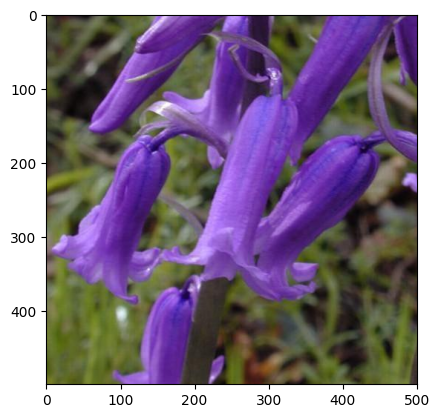

In [ ]:
plt.imshow(mpimg.imread(filenames[250]))

__Plot close images__

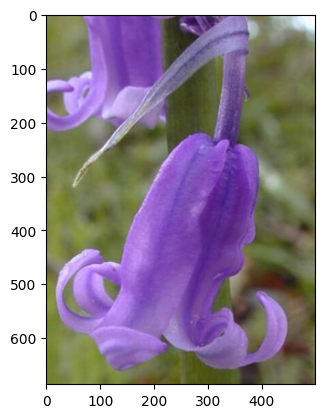

In [ ]:
plt.imshow(mpimg.imread(filenames[248]))

__Plot target and top 3 closest together__

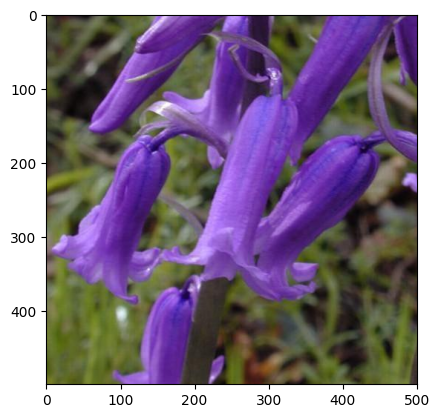

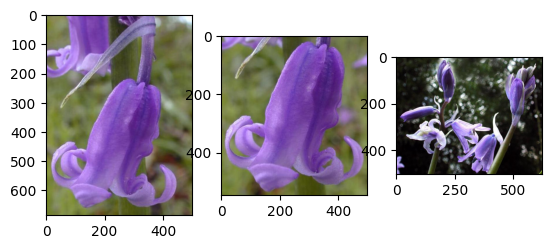

In [ ]:
# plt target
plt.imshow(mpimg.imread(filenames[250]))

# plot 3 most similar 
f, axarr = plt.subplots(1,3)
axarr[0].imshow(mpimg.imread(filenames[idxs[0]]))
axarr[1].imshow(mpimg.imread(filenames[idxs[1]]))
axarr[2].imshow(mpimg.imread(filenames[idxs[2]]))

## Simple style transfer

__Load a quick style transfer model from TF Hub__

You can find more details [here](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization)

# Load TF-Hub module.
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

__Load the content image and the style image__

In [ ]:
content_image = st_load("../data/img/florence.jpg")
style_image = st_load("../data/img/starry_night.jpg")

# st_load doesn't work because of Ross:)

NameError: name 'st_load' is not defined

__Process using the model__

In [ ]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

__Show content, style, and stylized image__

In [ ]:
show_n([content_image, style_image, stylized_image], 
       titles=['Original content image', 'Style image', 'Stylized image'])

### Task1 
- Run this same pipeline on the Indo Fashion dataset. How does it perform?

### Task 2
- Take the code in this notebook and turn it into a Python script. You can then add this to the repo for your Assignment 1 solution for creating doing image search
  - I.e. your Assignment 1 repo would contain both code for image search using colour histograms *and* for image search using a pretrained CNN.

### Task 3 
- Continue working on Assignment 3 in-class just now.